# Research data supporting "Going for Gold(-Standard): Attaining Coupled Cluster Accuracy in Oxide-Supported Nanoclusters

This notebook accompanies our paper: **Going for Gold(-Standard): Attaining Coupled Cluster Accuracy in Oxide-Supported Nanoclusters**.

### Abstract

Metal nanoclusters supported on oxide surfaces are widely-used catalysts that boast sharply enhanced activity over their bulk, especially for the coinage metals: Au, Ag, and Cu. These properties depend sensitively on the nanocluster structure, which are challenging to model with density functional theory (DFT). Leveraging the recently developed SKZCAM protocol, we perform the first-ever benchmark study of coinage metal structures on the MgO surface with coupled cluster theory [CCSD(T)] -- the gold-standard modeling technique. Our benchmarks reveal that no DFT exchange-correlation functional (and dispersion correction) can accurately model this system. We demonstrate that this arises from inadequate account of metal-metal interactions and propose a high-level correction which provides reference accuracy at low cost. This forges a path towards studying larger systems, which we highlight by benchmarking Au20 on MgO, a challenging system where DFT disagrees significantly on its structure.


## Contents
* [Table S1 - List of DFT models and cWFT methods used in this work](#tables1)
* [Table S2 to S5 - Benchmarking the reliability of the LNO-CCSD(T) procedure](#tables2)
* [Figure S4 and S5 - Convergence of SKZCAM protocol for supported nanocluster benchmarks](#figs4)
* [Figure S7 - Benchmarking metal-metal interactions in gas-phase nanoclusters](#figs6)
* [Figure S8 - Benchmarking metal-support interactions in oxide-supported coinage metal dimers](#figs7)
* [Figure 2 - Benchmarking both metal-metal and metal-support interactions](#fig2)
* [Figure S9 - Benchmarking &Delta;CC approach in oxide-supported coinage metal tetramers](#figs9)
* [Figure 4, S10, Table S7 and S8 - Comparison of DFT models and &Delta;CC approach for Au<sub>20</sub> on MgO](#fig4)


In [45]:
# Check if we are in Google Colab environment
try:
    import google.colab
    IN_COLAB = True
    usetex = False
except:
    import os
    IN_COLAB = False
    if os.path.expanduser('~') == '/home/shixubenjamin':
        usetex = True
    else:
        usetex = False

# If in Google Colab, install the necessary data and set up the necessary environment
if IN_COLAB == True:
    !rm -rf /content/Data_CO_on_MgO-main /content/main.zip
    !wget https://github.com/benshi97/Data_CO_on_MgO/archive/refs/heads/main.zip
    !unzip /content/main.zip
    ! apt install ase
    !pip install pyblock datetime
    %pwd
    %cd /content/Data_CO_on_MgO-main

In [46]:
from ase import io
from ase.units import mol, kcal, kJ, Hartree
import numpy as np
import pandas as pd
import pyblock
from Scripts.jup_plot import *
if usetex == True:
    textrue_import()
else:
    texfalse_import()

from Scripts.cluster_scripts import *
import Scripts.extrapolate as extrapolate


# List of DFT functionals used in this study
dft_functionals = {
    "PBE": {"type": "GGA", "dispersion correction": "None"},
    "PBE-D2": {"type": "GGA", "dispersion correction": "D2"},
    "PBE-D2[Ne]": {"type": "GGA", "dispersion correction": "D2 w/ Ne coefficients on Mg"},
    "PBE-DDsC": {"type": "GGA", "dispersion correction": "DDSC"},
    "PBE-D3": {"type": "GGA", "dispersion correction": "D3 with zero-damping"},
    "PBE-D3(BJ)": {"type": "GGA", "dispersion correction": "D3 with Becke-Johnson damping"},
    "PBE-TS": {"type": "GGA", "dispersion correction": "Tkatchenko-Scheffler"},
    "PBE-TS/HI": {"type": "GGA", "dispersion correction": "TS with iterative Hirshfeld partitioning"},
    "PBE-D4": {"type": "GGA", "dispersion correction": "D4"},
    "PBE-MBD/HI" : {"type": "GGA", "dispersion correction": "MBD with iterative Hirshfeld partitioning"},
    "PBE-MBD/FI": {"type": "GGA", "dispersion correction": "MBD with fractional ion scheme"},
    "PBEsol": {"type": "GGA", "dispersion correction": "None"},
    "PBEsol-D3(BJ)": {"type": "GGA", "dispersion correction": "D3 with Becke-Johnson damping"},
    "PBEsol-D4": {"type": "GGA", "dispersion correction": "D4"},
    "revPBE": {"type": "GGA", "dispersion correction": "None"},
    "revPBE-D3": {"type": "GGA", "dispersion correction": "D3 with zero-damping"},
    "revPBE-D3(BJ)": {"type": "GGA", "dispersion correction": "D3 with Becke-Johnson damping"},
    "revPBE-D4": {"type": "GGA", "dispersion correction": "D3"},
    "vdW-DF": {"type": "vdW-inclusive", "dispersion correction": "None"},
    "vdW-DF2": {"type": "vdW-inclusive", "dispersion correction": "None"},
    "optB86b-vdW": {"type": "vdW-inclusive", "dispersion correction": "None"},
    "rev-vdW-DF2": {"type": "vdW-inclusive", "dispersion correction": "None"},
    "TPSS": {"type": "meta-GGA", "dispersion correction": "None"},
    "M06L": {"type": "meta-GGA", "dispersion correction": "None"},
    "R2SCAN": {"type": "meta-GGA", "dispersion correction": "None"},
    "R2SCAN-D3(BJ)": {"type": "meta-GGA", "dispersion correction": "D3 with Becke-Johnson damping"},
    "R2SCAN-D4": {"type": "meta-GGA", "dispersion correction": "D4"},
    "R2SCAN-rVV10": {"type": "meta-GGA", "dispersion correction": "rVV10"},
    "PBE0": {"type": "Hybrid", "dispersion correction": "None"},
    "PBE0-TS/HI": {"type": "Hybrid", "dispersion correction": "TS with iterative Hirshfeld partitioning"},
    "PBE0-D3": {"type": "Hybrid", "dispersion correction": "D3 with zero-damping"},
    "PBE0-D3(BJ)": {"type": "Hybrid", "dispersion correction": "D3 with Becke-Johnson damping"},
    "PBE0-D4": {"type": "Hybrid", "dispersion correction": "D4"},
    "HSE06": {"type": "range-separated Hybrid", "dispersion correction": "None"},
    "HSE06-D4": {"type": "range-separated Hybrid", "dispersion correction": "D4"},
    "B3LYP": {"type": "Hybrid", "dispersion correction": "None"},
    "B3LYP-D2[Ne]": {"type": "Hybrid", "dispersion correction": "D2 w/ Ne coefficients on Mg"},
    "B3LYP-D2": {"type": "Hybrid", "dispersion correction": "D2"},
    "B3LYP-D3": {"type": "Hybrid", "dispersion correction": "D3 with zero-damping"},
    "B3LYP-D3(BJ)": {"type": "Hybrid", "dispersion correction": "D3 with Becke-Johnson damping"},
    "B3LYP-D4": {"type": "Hybrid", "dispersion correction": "D4"},
    "B2PLYP": {"type": "Double Hybrid", "dispersion correction": "None"},
    "HF": {"type": "Hartree-Fock", "dispersion correction": "None"},
    "MP2": {"type": "cWFT", "dispersion correction": "None"},
    "CCSD": {"type": "cWFT", "dispersion correction": "None"},
    "CCSD(T)": {"type": "cWFT", "dispersion correction": "None"}
}

dft_functionals_gas_name_convert = {}
for x in dft_functionals:
    if 'D3(BJ)' in x:
        dft_functionals_gas_name_convert[x] = (x[:-6] + 'D3').lower()
    elif 'D2[Ne]' in x:
        dft_functionals_gas_name_convert[x] = (x[:-6] + 'D2').lower()
    elif 'D3' in x:
        dft_functionals_gas_name_convert[x] = (x[:-2] + 'D30').lower()
    elif '/' in x:
        dft_functionals_gas_name_convert[x] = (x.replace('/','')).lower()
    elif x == 'optB86b-vdW':
        dft_functionals_gas_name_convert[x] = 'optB86b-vdw'
    elif x == 'rev-vdW-DF2':
        dft_functionals_gas_name_convert[x] = 'rev-vdw-DF2'
    else:
        dft_functionals_gas_name_convert[x] = x.lower()

dft_functionals_oxide_name_convert = dft_functionals_gas_name_convert.copy()
dft_functionals_oxide_name_convert['B3LYP-D2[Ne]'] = 'B3LYP-D2-Ne'.lower()
dft_functionals_oxide_name_convert['PBE-D2[Ne]'] = 'PBE-D2-Ne'.lower()


# Some basic conversion factors
kcalmol_to_meV = kcal / mol * 1000
kjmol_to_meV = kJ / mol * 1000
mha_to_meV = Hartree

<a id='tables1'></a>
## Table S1 - List of DFT models and cWFT methods benchmarked in this work

In [47]:
df = pd.DataFrame.from_dict(dft_functionals, orient='index')
df

type  \
PBE                               GGA   
PBE-D2                            GGA   
PBE-D2[Ne]                        GGA   
PBE-DDsC                          GGA   
PBE-D3                            GGA   
PBE-D3(BJ)                        GGA   
PBE-TS                            GGA   
PBE-TS/HI                         GGA   
PBE-D4                            GGA   
PBE-MBD/HI                        GGA   
PBE-MBD/FI                        GGA   
PBEsol                            GGA   
PBEsol-D3(BJ)                     GGA   
PBEsol-D4                         GGA   
revPBE                            GGA   
revPBE-D3                         GGA   
revPBE-D3(BJ)                     GGA   
revPBE-D4                         GGA   
vdW-DF                  vdW-inclusive   
vdW-DF2                 vdW-inclusive   
optB86b-vdW             vdW-inclusive   
rev-vdW-DF2             vdW-inclusive   
TPSS                         meta-GGA   
M06L                         meta-GGA   
R2SCAN                       meta-GGA   
R2SCAN-D3(BJ)                meta-GGA   
R2SCAN-D4                    meta-GGA   
R2SCAN-rVV10                 meta-GGA   
PBE0                           Hybrid   
PBE0-TS/HI                     Hybrid   
PBE0-D3                        Hybrid   
PBE0-D3(BJ)                    Hybrid   
PBE0-D4                        Hybrid   
HSE06          range-separated Hybrid   
HSE06-D4       range-separated Hybrid   
B3LYP                          Hybrid   
B3LYP-D2[Ne]                   Hybrid   
B3LYP-D2                       Hybrid   
B3LYP-D3                       Hybrid   
B3LYP-D3(BJ)                   Hybrid   
B3LYP-D4                       Hybrid   
B2PLYP                  Double Hybrid   
HF                       Hartree-Fock   
MP2                              cWFT   
CCSD                             cWFT   
CCSD(T)                          cWFT   

                                   dispersion correction  
PBE                                                 None  
PBE-D2                                                D2  
PBE-D2[Ne]                   D2 w/ Ne coefficients on Mg  
PBE-DDsC                                            DDSC  
PBE-D3                              D3 with zero-damping  
PBE-D3(BJ)                 D3 with Becke-Johnson damping  
PBE-TS                              Tkatchenko-Scheffler  
PBE-TS/HI       TS with iterative Hirshfeld partitioning  
PBE-D4                                                D4  
PBE-MBD/HI     MBD with iterative Hirshfeld partitioning  
PBE-MBD/FI                MBD with fractional ion scheme  
PBEsol                                              None  
PBEsol-D3(BJ)              D3 with Becke-Johnson damping  
PBEsol-D4                                             D4  
revPBE                                              None  
revPBE-D3                           D3 with zero-damping  
revPBE-D3(BJ)              D3 with Becke-Johnson damping  
revPBE-D4                                             D3  
vdW-DF                                              None  
vdW-DF2                                             None  
optB86b-vdW                                         None  
rev-vdW-DF2                                         None  
TPSS                                                None  
M06L                                                None  
R2SCAN                                              None  
R2SCAN-D3(BJ)              D3 with Becke-Johnson damping  
R2SCAN-D4                                             D4  
R2SCAN-rVV10                                       rVV10  
PBE0                                                None  
PBE0-TS/HI      TS with iterative Hirshfeld partitioning  
PBE0-D3                             D3 with zero-damping  
PBE0-D3(BJ)                D3 with Becke-Johnson damping  
PBE0-D4                                               D4  
HSE06                                               None  
HSE06-D4                                

<a id='tables2'></a>
## Benchmarking reliability of our LNO-CCSD(T) procedure

### Table S3 - Comparing CCSD(T) against CCSDT(Q) for gas-phase tetramers

In [48]:
# We compare the relative energies of gas-phase tetramers between CCSD(T) and CCSDT(Q) with the def2-SV(P) basis set

# Initialize the dictionary for comparing ccsdt and ccsdtq
ccsdtq_tetramer_ene = {y: {x: {'ccsdt': 0, 'ccsdtq': 0 , 'diff': 0} for x in ['Au','Ag','Cu']}  for y in [2,3,4]}

# Loop over the 4 Au, Ag, and Cu tetramer geometries, getting energy relative to the first geometry of the appropriate coinage metal
total_diff = 0
for i in ['Au','Ag','Cu']:
    for j in [1,2,3,4]:
        # Get the relative energy at the CCSDT(Q) level
        ene_ccsdtq = find_energy(f"Data/01-Gas_Cluster/cWFT/CCSDTQ/CCSDTQ/{i}_{j}/mrcc.out",typ="ccsdtq")
        if j == 1:
            ene0_ccsdtq = ene_ccsdtq
        # Get the relative energy at the CCSD(T) level
        ene_ccsdt = find_energy(f"Data/01-Gas_Cluster/cWFT/CCSDTQ/CCSDT/{i}_{j}/mrcc.out",typ="ccsdt_tot")
        if j == 1:
            ene0_ccsdt = ene_ccsdt

        if j > 1:
            ccsdtq_tetramer_ene[j][i]['ccsdtq'] = (ene_ccsdtq-ene0_ccsdtq)*Hartree*1000
            ccsdtq_tetramer_ene[j][i]['ccsdt'] = (ene_ccsdt-ene0_ccsdt)*Hartree*1000
            # Get the difference in relative energy between CCSD(T) and CCSDT(Q)
            ccsdtq_tetramer_ene[j][i]['diff'] = ((ene_ccsdtq-ene0_ccsdtq) - (ene_ccsdt-ene0_ccsdt))*Hartree*1000
            total_diff += abs((ene_ccsdtq-ene0_ccsdtq) - (ene_ccsdt-ene0_ccsdt))*Hartree*1000


# Convert the nested dictionary to a MultiIndex DataFrame
df = pd.concat({k: pd.DataFrame(v) for k, v in ccsdtq_tetramer_ene.items()}, axis=0)

# Reset the index to have tetramers (2, 3, 4) as rows
df = df.unstack(level=0)

df = df.round(0).astype(int)

# Adjust column names
df.columns = pd.MultiIndex.from_tuples(df.columns)

if IN_COLAB == False:
    df.to_clipboard(excel=True,sep=',')
    

print('MAD: {0} meV'.format(int(total_diff/9)))

df

MAD: 13 meV


Au              Ag             Cu            
         2    3     4    2    3    4    2     3     4
ccsdt   40  525  1054  286  788  980  632  1466  1044
ccsdtq  43  523  1042  287  776  970  621  1485   995
diff     3   -1   -12    1  -12  -10  -11    18   -49

### Table S4 - Multireference diagnostics for larger gas-phase clusters

In [49]:
# MR character for Au4, Ag4, Cu4, Au6, Ag6, Cu6, Au8, Cu8, Ag8, Au20
# We use the %Ecorr metric to determine multi-reference character as it is highly robust.

# Initialize the dictionary for MR character
mr_character = {x: {y:0 for y in [1,2,3,4]} for x in ['Au4', 'Ag4', 'Cu4', 'Au6', 'Ag6', 'Cu6', 'Au8', 'Ag8', 'Cu8', 'Au20']}

for i in ['Au4', 'Ag4', 'Cu4', 'Au6', 'Ag6', 'Cu6', 'Au8', 'Ag8', 'Cu8']:
    for j in [1,2,3,4]:

        a1 = find_energy('Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{0}/{1}/1/mrcc.out'.format(i,j),code_format='mrcc',typ='ccsd')
        a2 = find_energy('Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{0}/{1}/2/mrcc.out'.format(i,j),code_format='mrcc',typ='ccsd')
        a3 = find_energy('Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{0}/{1}/3/mrcc.out'.format(i,j),code_format='mrcc',typ='ccsd')
        diff = a1 - a2
        dummy1 = extrapolate.get_cbs(0,a1,0,a2,X=3,Y=4,family='mixcc',output=False)

        a1 = find_energy('Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{0}/{1}/1/mrcc.out'.format(i,j),code_format='mrcc',typ='ccsdt')
        a2 = find_energy('Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{0}/{1}/2/mrcc.out'.format(i,j),code_format='mrcc',typ='ccsdt')
        a3 = find_energy('Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{0}/{1}/3/mrcc.out'.format(i,j),code_format='mrcc',typ='ccsdt')
        diff = a1 - a2
        dummy2 = extrapolate.get_cbs(0,a1,0,a2,X=3,Y=4,family='mixcc',output=False)
        mr_character[i][j] = 100*dummy1[-1]/dummy2[-1]

for i in [1,2]:
    a1 = find_energy('Data/04-M20_MgO/CC/{0}/1/mrcc.out'.format(i),code_format='mrcc',typ='ccsd')
    a2 = find_energy('Data/04-M20_MgO/CC/{0}/1/mrcc.out'.format(i),code_format='mrcc',typ='ccsdt')
    mr_character['Au20'][i] = 100* a1/a2




df = pd.DataFrame.from_dict(mr_character)

if IN_COLAB == False:
    df.to_clipboard(excel=True,sep=',')

    df = df.round(2)


df

Au4    Ag4    Cu4    Au6    Ag6    Cu6    Au8    Ag8    Cu8   Au20
1  95.56  96.01  95.95  95.52  95.94  95.87  95.51  95.94  95.85  95.52
2  95.66  96.06  96.03  95.42  95.87  95.80  95.32  95.79  95.66  95.48
3  95.66  96.07  96.11  95.40  95.88  95.74  95.41  95.88  95.76   0.00
4  95.61  96.03  95.88  95.39  95.89  95.74  95.27  95.74  95.63   0.00

### Table S5 - Demonstrating negligible BSSE effects in computing relative energies

In [50]:
# We compute the relative energy of the gas-phase tetramers with LNO-CCSD(T) and DF-CCSD(T)
# Initialize the dictionary for comparing lno and df
bsse_df_au_tetramer_ene = {x: {'non BSSE-corrected': 0, 'BSSE-corrected':0} for x in [2,3,4]}

# Loop over the 4 Au, Ag, and Cu tetramer geometries, getting energy relative to the first geometry of the appropriate coinage metal

tot_ene_list = []
atom_ene_list = []

# Start by getting the total energy and BSSE-corrected atomisation energy for each system
for i in [1,2,3,4]:
    dummy_ene_list = []
    for j in range(5):
        ene_hf = []
        ene_ccsdt = []
        for k in ['TZ','QZ']:
            ene_hf += [find_energy(f'Data/01-Gas_Cluster/cWFT/CCSDT/BSSE_Test/{i}/{k}/{j}/mrcc.out',code_format='mrcc',typ='hf')]
            ene_ccsdt += [find_energy(f'Data/01-Gas_Cluster/cWFT/CCSDT/BSSE_Test/{i}/{k}/{j}/mrcc.out',code_format='mrcc',typ='ccsdt')]
        extrap_ene = extrapolate.get_cbs(ene_hf[0], ene_ccsdt[0], ene_hf[1], ene_ccsdt[1], X=3, Y=4, family='mixcc',output=False)
        dummy_ene_list += [extrap_ene[-1]*Hartree*1000]
    tot_ene_list += [dummy_ene_list[0]]
    atom_ene_list += [dummy_ene_list[0] - dummy_ene_list[1] - dummy_ene_list[2] - dummy_ene_list[3] - dummy_ene_list[4]] 

    if i > 1:
        bsse_df_au_tetramer_ene[i]['non BSSE-corrected'] = round(tot_ene_list[i-1] - tot_ene_list[0])
        bsse_df_au_tetramer_ene[i]['BSSE-corrected'] = round(atom_ene_list[i-1] - atom_ene_list[0])

# Convert the nested dictionary to a MultiIndex DataFrame
df = pd.DataFrame.from_dict(bsse_df_au_tetramer_ene)

# Convert elements into integers
df = df.round(0).astype(int)

if IN_COLAB == False:
    df.to_clipboard(excel=True,sep=',')
    
df


2    3     4
non BSSE-corrected  148  769  1229
BSSE-corrected      144  764  1226

### Table S5 - Demonstrating that LNO-CCSD(T) agrees excellently with CCSD(T)

In [51]:
# We compute the relative energy of the gas-phase tetramers with LNO-CCSD(T) and DF-CCSD(T)
# TODO: Replace FNO-CCSD(T) data with DF-CCSD(T) data

# Create list of data-points
tetramer_structure_list = [f'Au_{x}' for x in [2,3,4]] + [f'Ag_{x}' for x in [2,3,4]] + [f'Cu_{x}' for x in [2,3,4]]

# Initialize the dictionary for comparing lno and df
lno_df_tetramer_ene = {x: {'lno-ccsdt': 0, 'ccsdt': 0 , 'diff': 0}  for x in tetramer_structure_list}
# Loop over the 4 Au, Ag, and Cu tetramer geometries, getting energy relative to the first geometry of the appropriate coinage metal
for i in ['Au','Ag','Cu']:
    for j in [4]:
        for k in [2,3,4]:
            # Get the energy for canonical CCSD(T)
            ene_hf = []
            ene_ccsdt = []
            for indexl, l in enumerate(['TZ','QZ']):
                ene_hf += [find_energy(f'Data/01-Gas_Cluster/cWFT/CCSDT/{i}{j}/{k}/{indexl+1}/mrcc.out',code_format='mrcc',typ='hf') - find_energy(f'Data/01-Gas_Cluster/cWFT/CCSDT/{i}{j}/1/{indexl+1}/mrcc.out',code_format='mrcc',typ='hf')]
                ene_ccsdt += [find_energy(f'Data/01-Gas_Cluster/cWFT/CCSDT/{i}{j}/{k}/{indexl+1}/mrcc.out',code_format='mrcc',typ='ccsdt') - find_energy(f'Data/01-Gas_Cluster/cWFT/CCSDT/{i}{j}/1/{indexl+1}/mrcc.out',code_format='mrcc',typ='ccsdt')]
            extrap_rel_ene = extrapolate.get_cbs(ene_hf[0], ene_ccsdt[0], ene_hf[1], ene_ccsdt[1], X=3, Y=4, family='mixcc',output=False)
            lno_df_tetramer_ene[f'{i}_{k}']['ccsdt'] = extrap_rel_ene[-1]*Hartree*1000

            # Now, let's get the energy with LNO-CCSD(T)
            ene_hf = []
            ene_ccsdt = []
            for l in [1,2,3]:
                ene_hf += [find_energy(f'Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{i}{j}/{k}/{l}/mrcc.out',code_format='mrcc',typ='hf') - find_energy(f'Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{i}{j}/1/{l}/mrcc.out',code_format='mrcc',typ='hf')]
                ene_ccsdt += [find_energy(f'Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{i}{j}/{k}/{l}/mrcc.out',code_format='mrcc',typ='ccsdt') - find_energy(f'Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{i}{j}/1/{l}/mrcc.out',code_format='mrcc',typ='ccsdt')]

            extrap_rel_ene = extrapolate.get_cbs(ene_hf[0], ene_ccsdt[0], ene_hf[2], ene_ccsdt[2], X=3, Y=4, family='mixcc',output=False)
            lno_correction = ene_hf[1] + ene_ccsdt[1] - (ene_hf[0] + ene_ccsdt[0])
            lno_df_tetramer_ene[f'{i}_{k}']['lno-ccsdt'] = (extrap_rel_ene[-1] + lno_correction)*Hartree*1000
            lno_df_tetramer_ene[f'{i}_{k}']['diff'] = abs(lno_df_tetramer_ene[f'{i}_{k}']['lno-ccsdt'] - lno_df_tetramer_ene[f'{i}_{k}']['ccsdt'])
            # print(lno_df_tetramer_ene[i][j]['diff'])

# Convert the nested dictionary to a MultiIndex DataFrame
df = pd.DataFrame.from_dict(lno_df_tetramer_ene)

# Convert elements into integers
df = df.round(0).astype(int)

tetramer_lno_mad = np.sum([lno_df_tetramer_ene[x]['diff'] for x in tetramer_structure_list])/9

print(f'MAD: {tetramer_lno_mad:.0f} meV')

if IN_COLAB == False:
    df.to_clipboard(excel=True,sep=',')

df

MAD: 51 meV


Au_2  Au_3  Au_4  Ag_2  Ag_3  Ag_4  Cu_2  Cu_3  Cu_4
lno-ccsdt   143   687  1183   279   846   984   467  1250  1087
ccsdt       148   769  1229   338   957  1052   446  1237  1143
diff          5    81    46    59   111    68    20    13    56

<a id='figs4'></a>
## Benchmarking the SKZCAM protocol

### Figure S4 - Convergence of coinage metal dimers on MgO adsorption energy as a function of SKZCAM cluster size

In [52]:
# Dimers

# Initialize the dictionary for the convergence of adsorption energy with size of the cluster
dimer_size_ene_list = {x: [] for x in range(1,9)}

# This is the dictionary that connects the cluster index with the corresponding orientation/positions (e.g., OV, MV, etc.)
# We give 

dimer_dict = {
    1: ['OV', 5],
    2: ['MV', 6],
    3: ['HV', 3],
    4: ['HD', 6],
    5: ['OH', 4],
    6: ['MH', 5],
    7: ['OD', 4],
    8: ['MD', 5]
}

# Loop over each dimer structure
for i in range(1,9):
    for j in range(1,10):
        a = find_energy('Data/02-M2_MgO/cWFT/LNO-CCSDT/Size_Convergence/{0}/{1}/AD_SLAB/mrcc.out'.format(i,j),typ='lccsdt_tot')
        b = find_energy('Data/02-M2_MgO/cWFT/LNO-CCSDT/Size_Convergence/{0}/{1}/AD_CP/mrcc.out'.format(i,j),typ='lccsdt_tot')
        c = find_energy('Data/02-M2_MgO/cWFT/LNO-CCSDT/Size_Convergence/{0}/{1}/SLAB_CP/mrcc.out'.format(i,j),typ='lccsdt_tot')
        dimer_size_ene_list[i] += [(a-b-c)*Hartree*1000]

ene_list_errors = {x: [] for x in range(1,9)}
dimer_size_mad_error = {dimer_dict[x][0]: 0 for x in range(1,9)}

# Calculate the error of the chosen cluster w.r.t. larger cluster sizes
for i in range(1,9):
    for j in range(1,10):
        if j > dimer_dict[i][1]:
            ene_list_errors[i] += [dimer_size_ene_list[i][j-1] - dimer_size_ene_list[i][dimer_dict[i][1]-1]]

    dimer_size_mad_error[dimer_dict[i][0]] = np.mean(np.abs(ene_list_errors[i]))




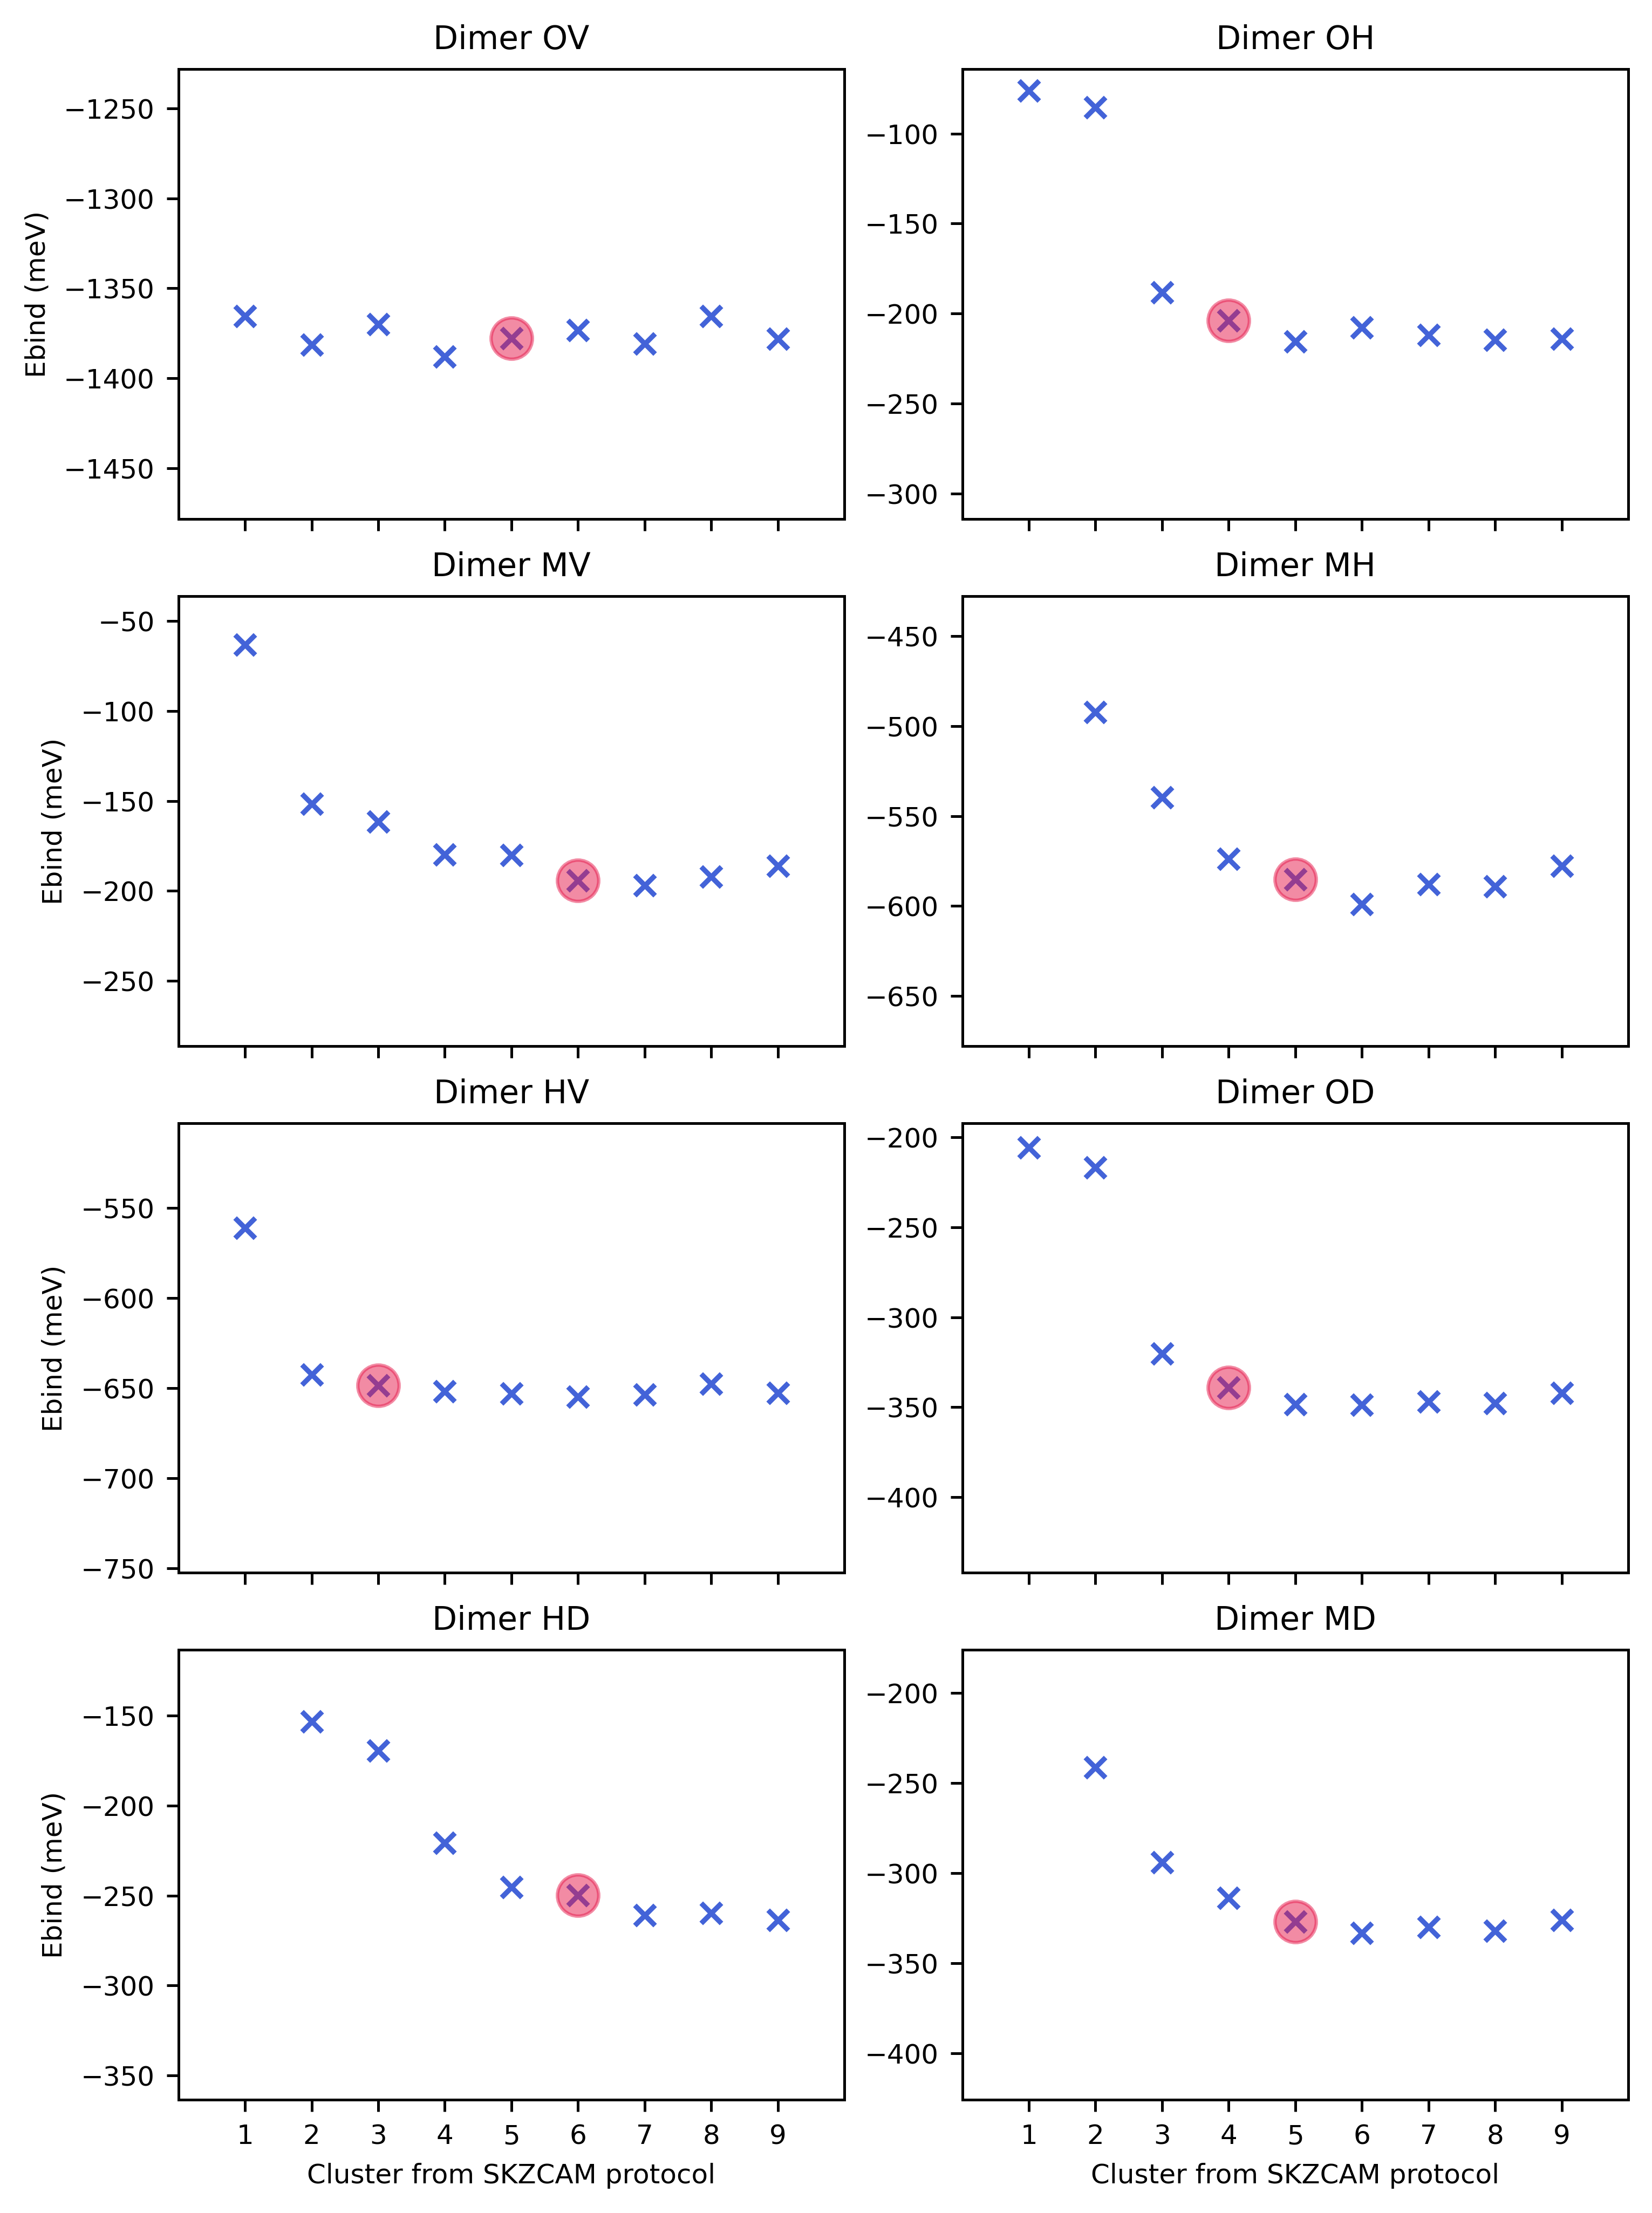

In [53]:
fig, axs = plt.subplots(4,2,figsize=(6.69,9),dpi=450,sharex=True,constrained_layout=True)

for i in range(1,9):
    b = divmod(i-1,4)[0]
    a = divmod(i-1,4)[1]
    axs[a,b].scatter(list(range(1,10)),dimer_size_ene_list[i], marker = 'x',color=color_dict['blue'])
    axs[a,b].scatter(dimer_dict[i][1],dimer_size_ene_list[i][dimer_dict[i][1]-1], s=150,marker = 'o', color = color_dict['red'], alpha = 0.5,edgecolor=None)
    axs[a,b].set_ylim([dimer_size_ene_list[i][-1] -100, dimer_size_ene_list[i][-1] + 150])
    axs[a,b].set_title('Dimer {0}'.format(dimer_dict[i][0]))
    axs[a,b].set_xlim([0,10])
    axs[a,b].set_xticks(list(range(1,10)))
    if b ==0 and usetex == True:
        axs[a,b].set_ylabel(r'$E_\textrm{bind}$ (meV)')
    elif b == 0 and usetex == False:
        axs[a,b].set_ylabel('Ebind (meV)')
    if a == 3:
        axs[a,b].set_xlabel('Cluster from SKZCAM protocol')

plt.savefig('Figures/Fig_S4.png')

### Figure S5 - Convergence of the relative energy of coinage metal tetramers on MgO as a function of cluster size

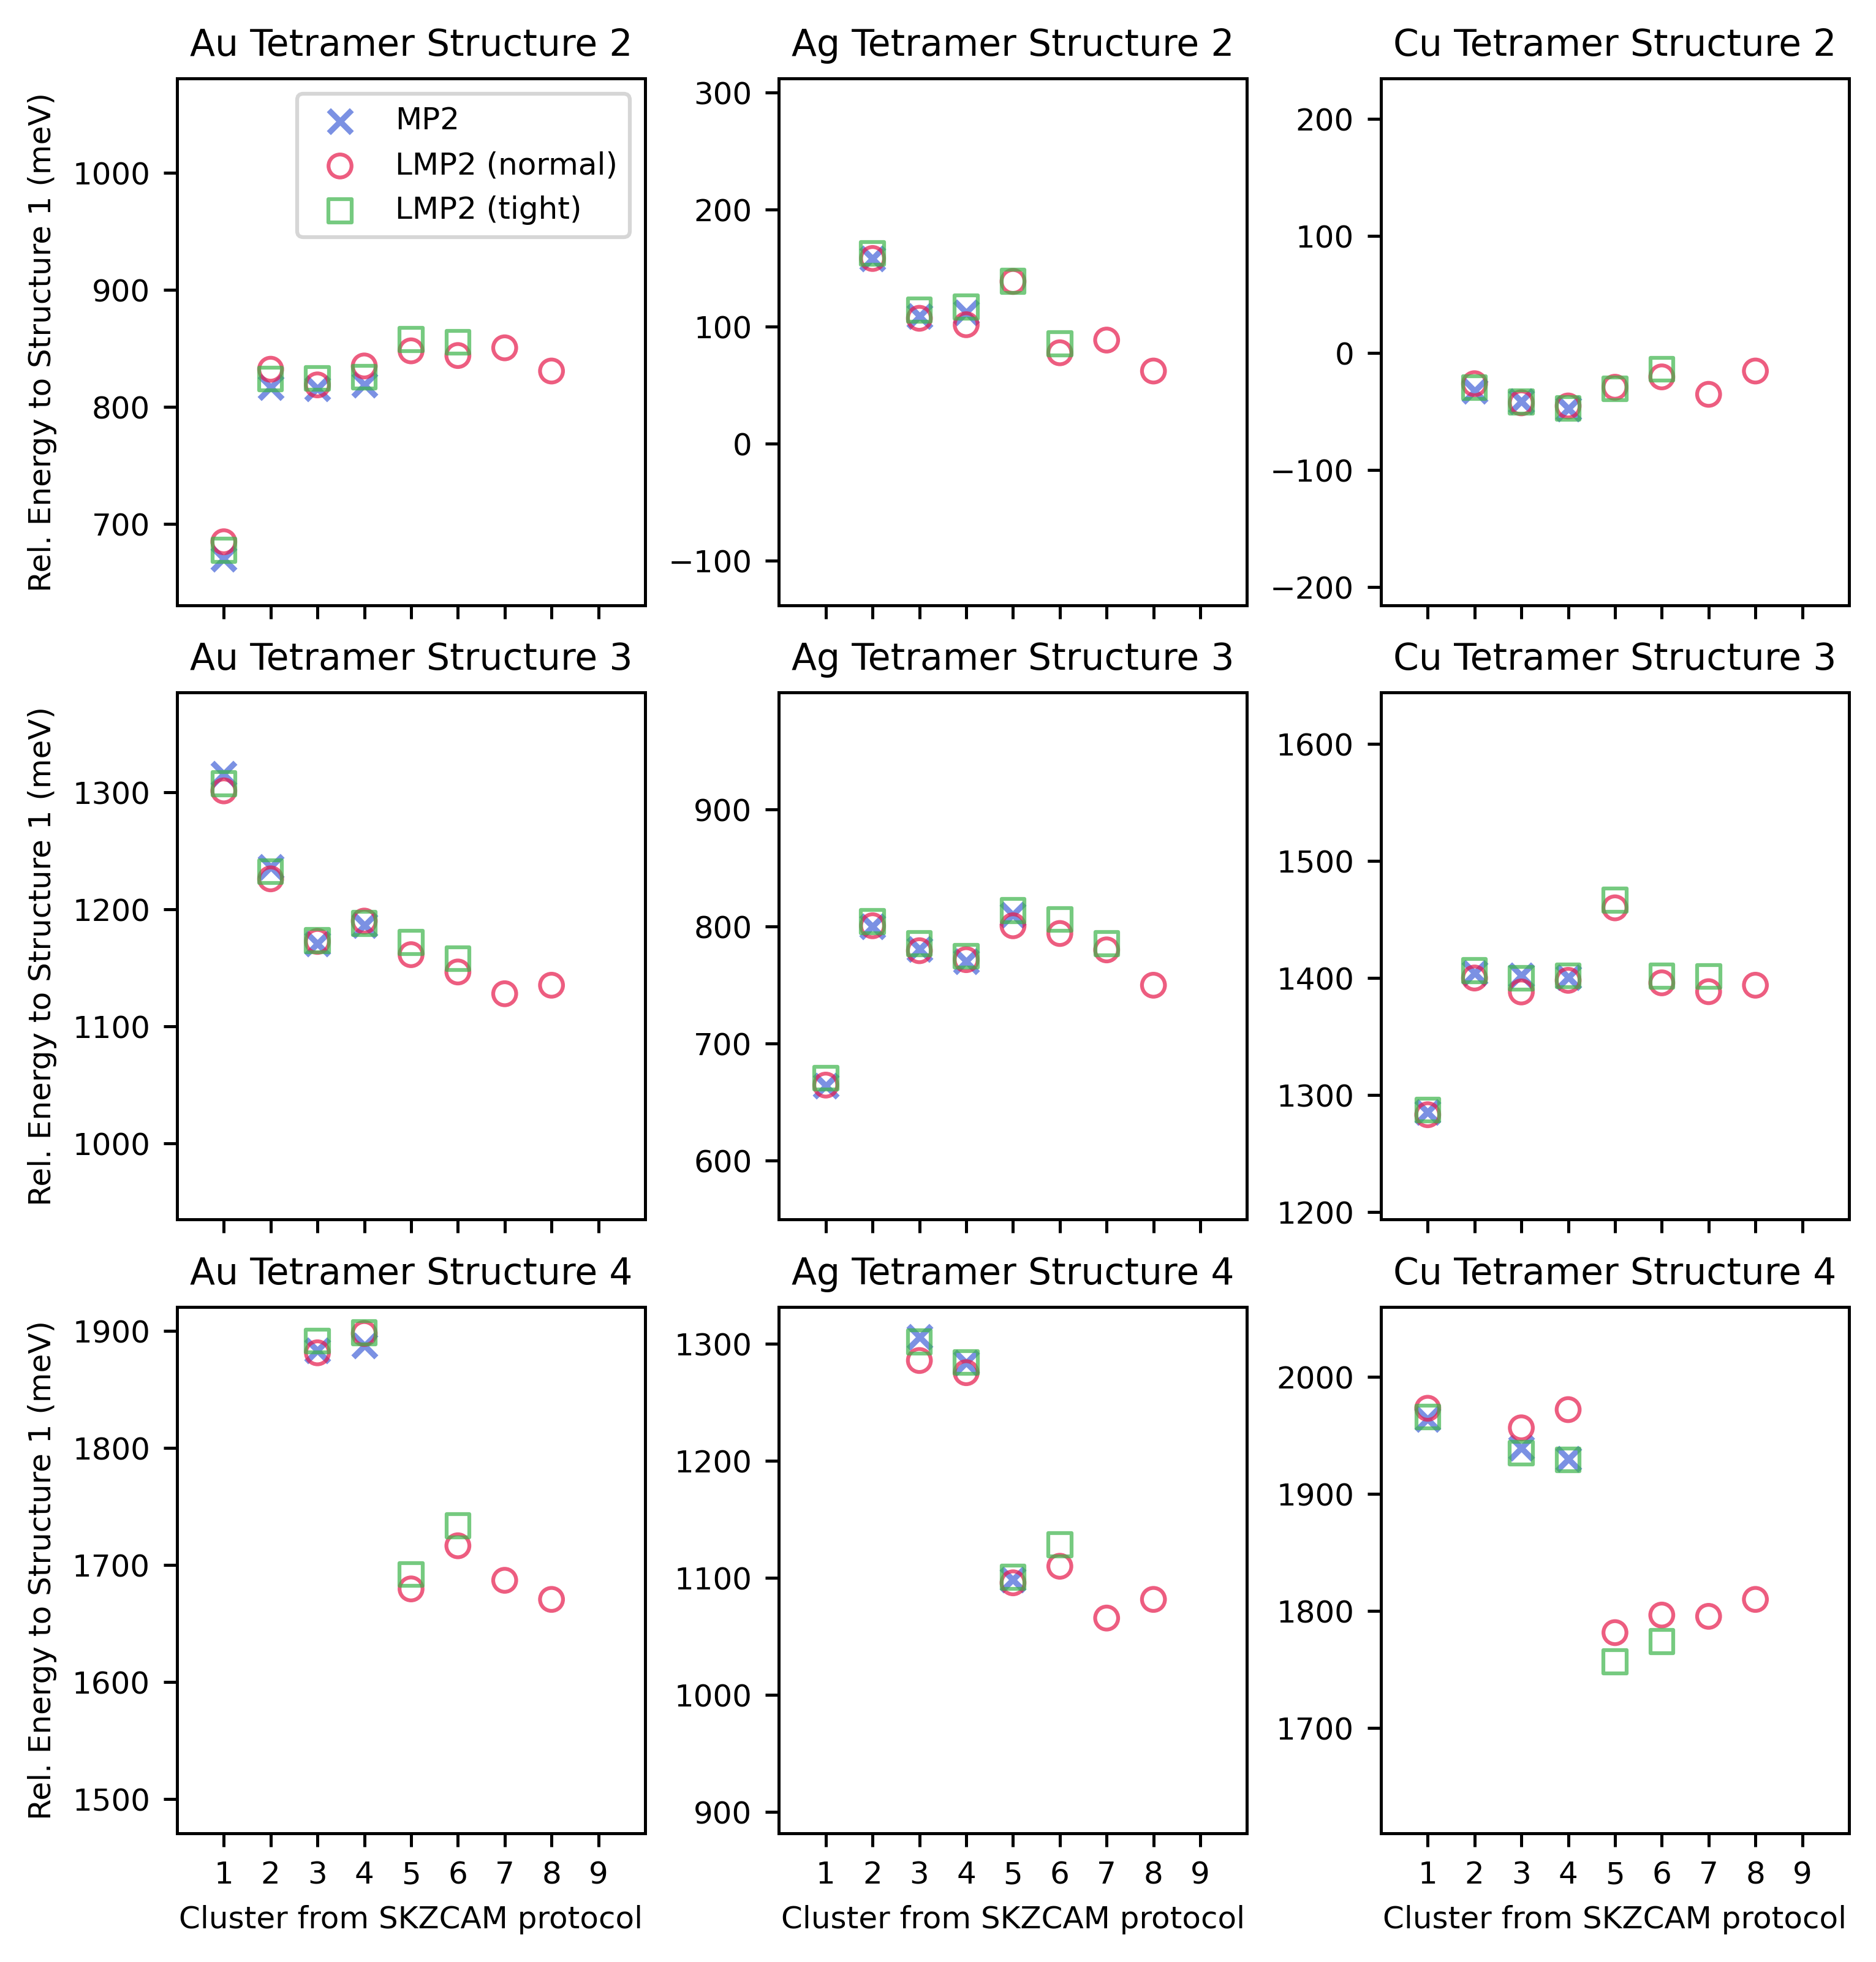

In [54]:
# Tetramers

tetramer_size_ene_list = {x: {y: {z: [] for z in ['DFMP2','LMP2_normal','LMP2_tight']} for y in [1,2,3,4]} for x in ['Au','Ag','Cu']}

for i in ['Au','Ag','Cu']:
    for j in [1,2,3,4]:
        for k in ['DFMP2','LMP2_normal','LMP2_tight']:
            for l in range(1,9):
                a0 = find_energy('Data/03-M4_MgO/cWFT/CCSDT/Size_Convergence/{0}/{1}/{2}/{3}/AD_SLAB/mrcc.out'.format(i,1,l,k),code_format='mrcc',typ='lmp2_tot')
                a = find_energy('Data/03-M4_MgO/cWFT/CCSDT/Size_Convergence/{0}/{1}/{2}/{3}/AD_SLAB/mrcc.out'.format(i,j,l,k),code_format='mrcc',typ='lmp2_tot')
                if np.abs(a-a0) < 0.0001:
                    tetramer_size_ene_list[i][j][k] += [10000]
                else:
                    tetramer_size_ene_list[i][j][k] += [(a-a0)*Hartree*1000]

fig, axs = plt.subplots(3,3,figsize=(6.69,7),dpi=450,sharex=True,constrained_layout=True)


for index,i in enumerate(['Au','Ag','Cu']):
    for j in [2,3,4]:
        axs[j-2,index].scatter(list(range(1,9)),tetramer_size_ene_list[i][j]['DFMP2'], marker = 'x',color=color_dict['blue'],alpha=0.7,label='MP2')
        axs[j-2,index].scatter(list(range(1,9)),tetramer_size_ene_list[i][j]['LMP2_normal'], marker = 'o',color=color_dict['red'],alpha=0.7,facecolor = 'none',label = 'LMP2 (normal)')
        axs[j-2,index].scatter(list(range(1,9)),tetramer_size_ene_list[i][j]['LMP2_tight'], marker = 's',color=color_dict['green'],alpha=0.7, facecolor='none', label = 'LMP2 (tight)')


        # axs[j,index].scatter(dimer_dict[i][1],dimer_size_ene_list[i][dimer_dict[i][1]-1], s=150,marker = 'o', color = color_dict['red'], alpha = 0.5,edgecolor=None)
        axs[j-2,index].set_ylim([tetramer_size_ene_list[i][j]['LMP2_normal'][-1] -200, tetramer_size_ene_list[i][j]['LMP2_normal'][-1] + 250])
        axs[j-2,index].set_title(f'{i} Tetramer Structure {j}')
        axs[j-2,index].set_xlim([0,10])
        axs[j-2,index].set_xticks(list(range(1,10)))
        if index ==0:
            axs[j-2,index].set_ylabel('Rel. Energy to Structure 1 (meV)') #([0,10])

            # axs[a,b].set_ylabel(r'$E_\textrm{bind}$ (meV)')
        if j == 4:
            axs[j-2,index].set_xlabel('Cluster from SKZCAM protocol')

axs[0,0].legend()

plt.savefig('Figures/Fig_S5.png')


<a id='figs6'></a>
## Benchmarking metal-metal interactions in gas-phase nanoclusters

### Fig S6 - Comparison of DFT models to LNO-CCSD(T) for gas-phase nanoclusters

/home/cwmyung/anaconda3/envs/intelpython/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


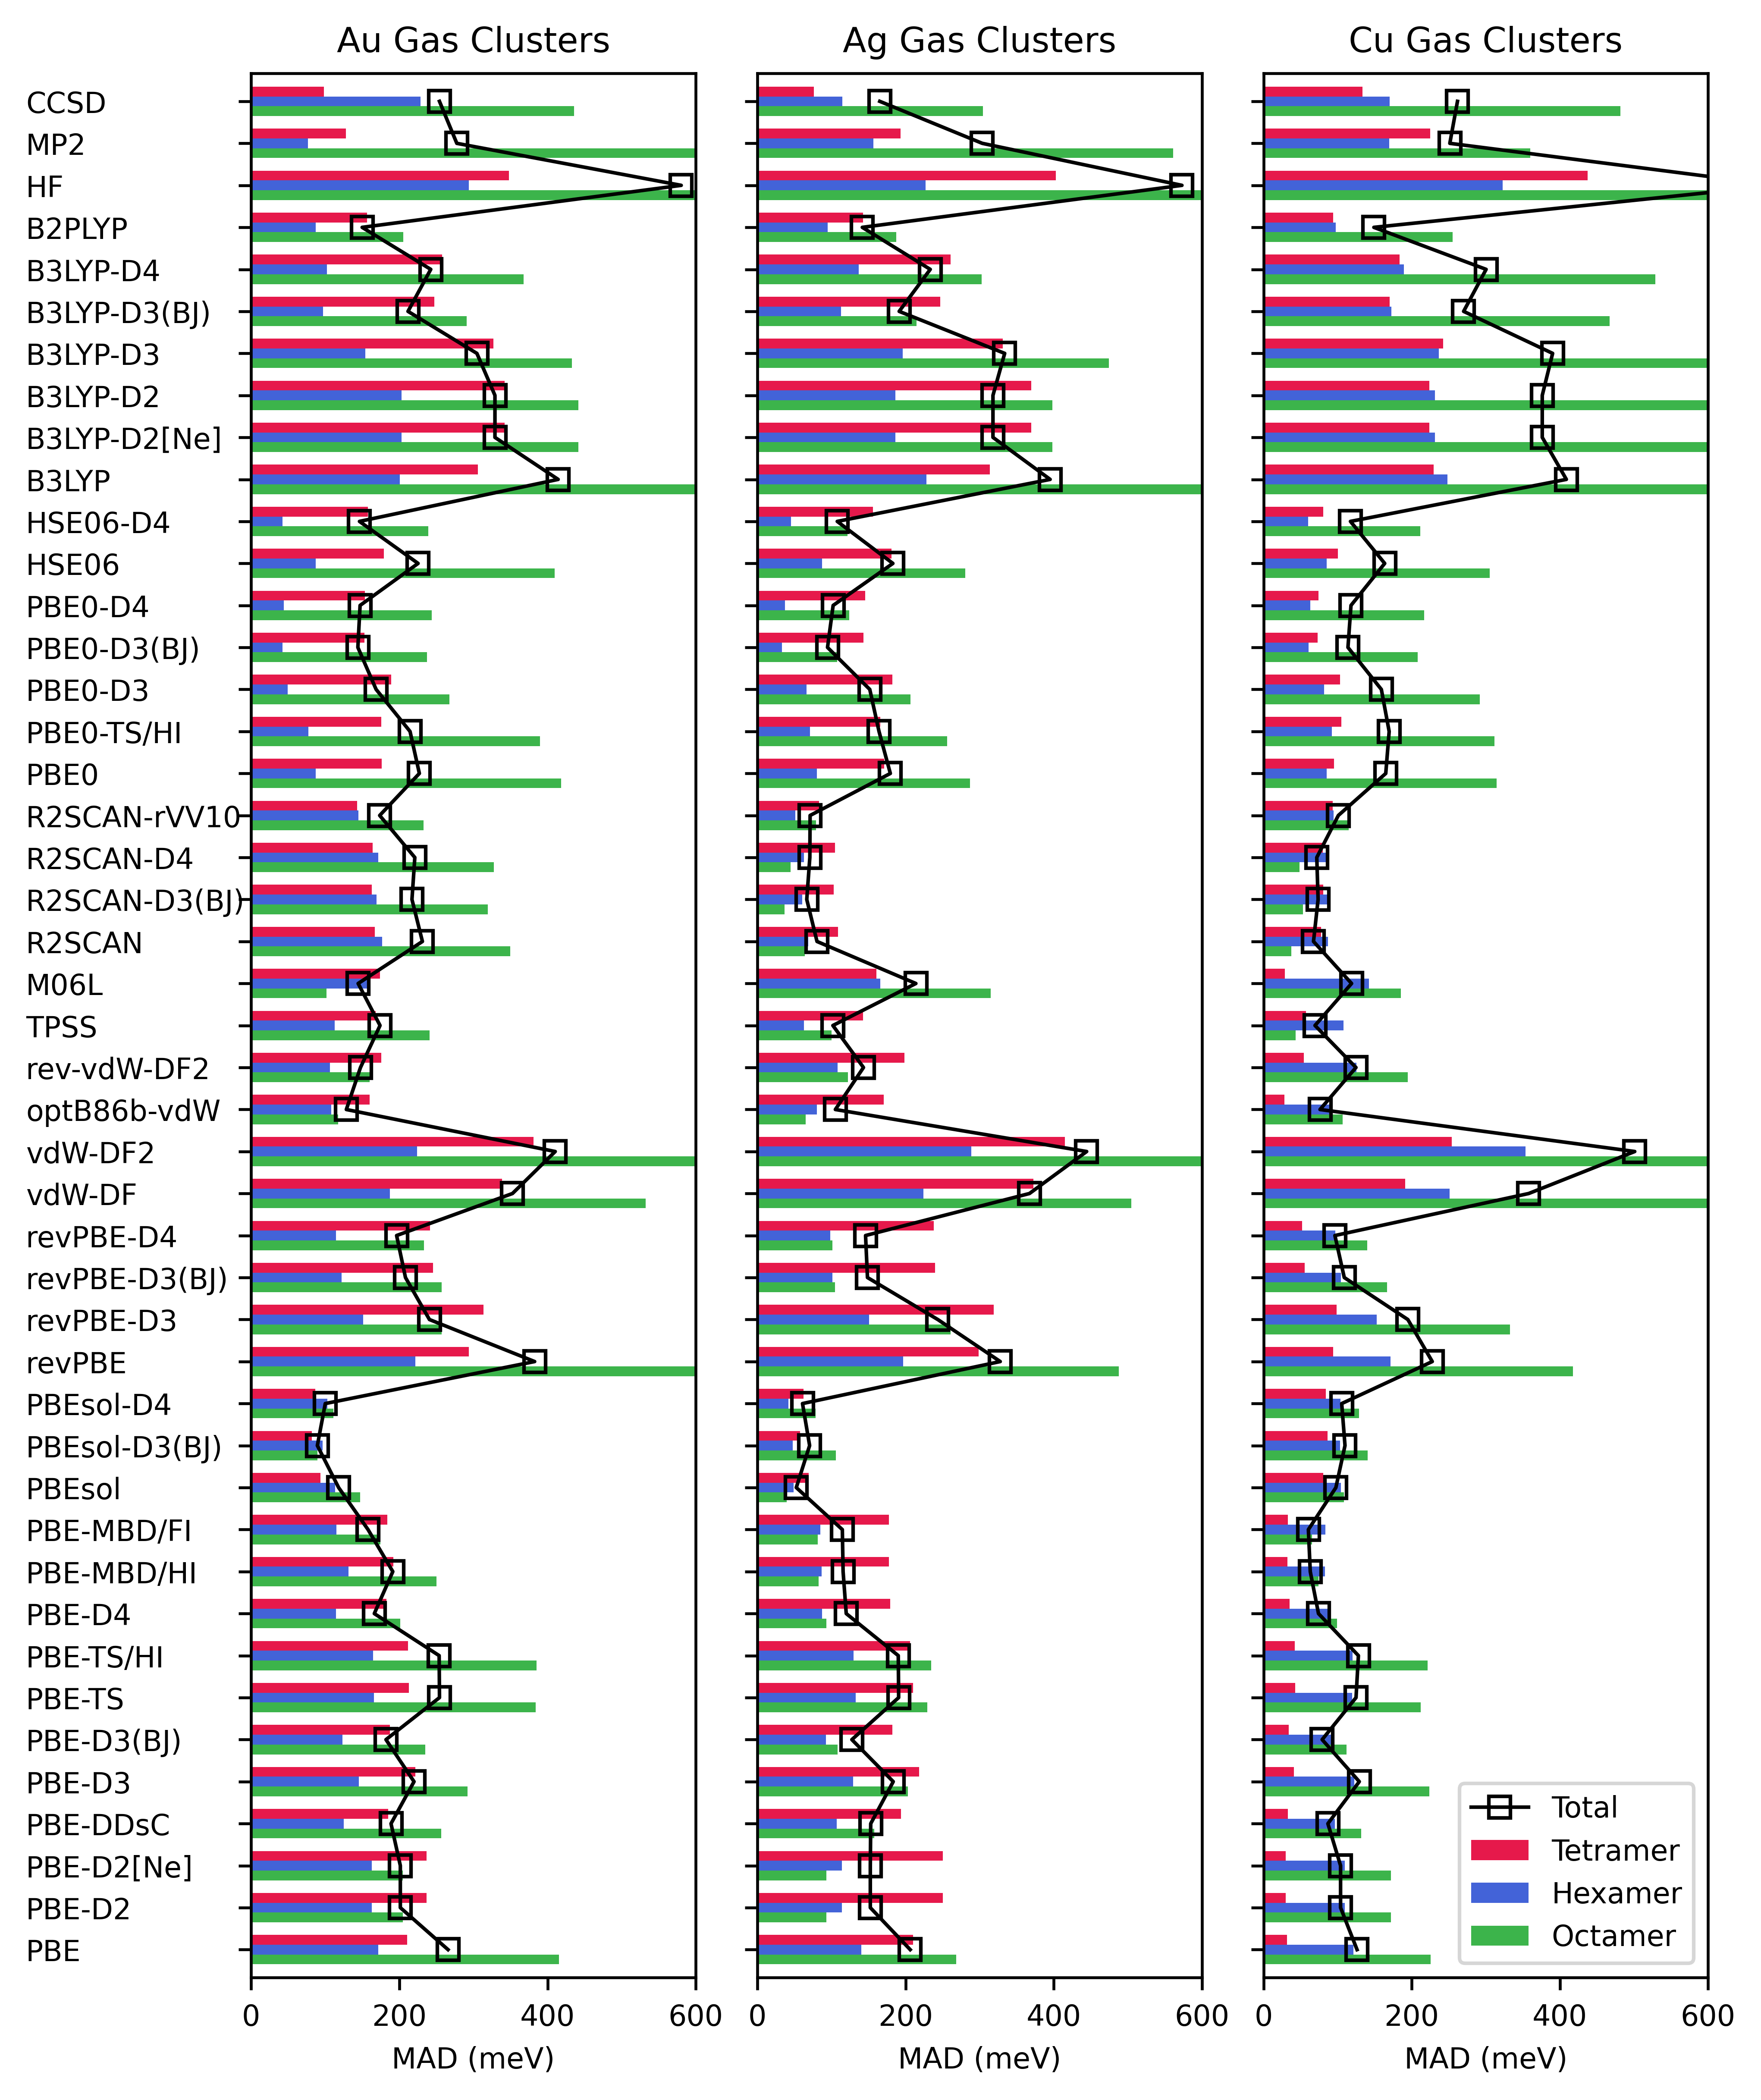

In [55]:
# xc_functional_list = ['PBE','PBE-D2','PBE-D2-Ne','PBE-DDSC','PBE-D3','PBE-TS','PBE-TSHI','PBE-D4','PBE-MBDHI','PBE-MBDFI','revPBE','revPBE-D3','revPBE-D4','PBEsol','PBEsol-D3','PBEsol-D4','vdW-DF','vdW-DF2','optB86b-vdW','rev-vdW-DF2','R2SCAN','R2SCAN-D3','R2SCAN-D4','SCAN-rVV10','PBE0','PBE0-D3','PBE0-D4','PBE0-TSHI','HSE06','HSE06-D4','B3LYP','B3LYP-D2','B3LYP-D2-Ne','B3LYP-D3','B3LYP-D4']
xc_functional_list = [x for x in dft_functionals][:-5]
full_methods_list = [x for x in dft_functionals]

xc_rel_ene_list = { x: { y: {z : [] for z in full_methods_list} for y in [4,6,8]}  for x in ['Au','Ag','Cu']}
xc_bind_ene_list = { x: { y: {z : [] for z in full_methods_list} for y in [4,6,8]}  for x in ['Au','Ag','Cu']}

xc_rel_ene_mad = { x: { y: {z : [] for z in full_methods_list} for y in [4,6,8,'Total']}  for x in ['Au','Ag','Cu','Total']}
xc_bind_ene_mad = { x: { y: {z : [] for z in full_methods_list} for y in [4,6,8]}  for x in ['Au','Ag','Cu']}


for i in ['Au','Ag','Cu']:
    for j in [4,6,8]:
        for k in xc_functional_list:
            # Convert the functional name to the appropriate format
            func_name = dft_functionals_gas_name_convert[k]
            
            # Energy of the ground-state cluster
            ene_0 = find_energy('Data/01-Gas_Cluster/DFT/{0}{1}/1/{2}/AD/OUTCAR'.format(i,j,func_name),code_format='vasp')

            # Find energy different w.r.t. the ground-state cluster for other clusters
            for l in [1,2,3,4]:
                ene_ad= find_energy('Data/01-Gas_Cluster/DFT/{0}{1}/{3}/{2}/AD/OUTCAR'.format(i,j,func_name,l),code_format='vasp')

                xc_rel_ene_list[i][j][k] += [(ene_ad - ene_0)*1000]
                xc_bind_ene_list[i][j][k] += [(ene_ad)*1000]
            
        # Get the energies for the cWFT methods and B3PLYP. The m variable represents the accuracy of the local thresholds. See Sec. S1.1
        for l in [1,2,3,4]:
            ene_hf = []
            ene_mp2 = []
            ene_ccsd = []
            ene_ccsdt = []
            ene_dft = []
            ene_b2plyp = [] 
            for m in [1,3,2]:
                root_folder = 'Data/01-Gas_Cluster/cWFT/LNO-CCSDT/{0}{1}/{2}/{3}/mrcc.out'.format(i,j,l,m)
                root_folder_b2plyp = 'Data/01-Gas_Cluster/cWFT/B2PLYP/{0}{1}/{2}/{3}/mrcc.out'.format(i,j,l,m)

                ene_hf += [find_energy(root_folder,code_format='mrcc',typ='hf')]
                ene_mp2 += [find_energy(root_folder,code_format='mrcc',typ='lmp2')]
                ene_ccsd += [find_energy(root_folder,code_format='mrcc',typ='lccsd')]
                ene_ccsdt += [find_energy(root_folder,code_format='mrcc',typ='lccsdt')]
                ene_dft += [find_energy(root_folder_b2plyp,code_format='mrcc',typ='hf')]
                ene_b2plyp += [find_energy(root_folder_b2plyp,code_format='mrcc',typ='B2PLYP')]


            dummy_dict ={
                'MP2': extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=3,Y=4,family='acc',\
                convert_Hartree=False ,shift=0.0,output=False),
                'CCSD': extrapolate.get_cbs(ene_hf[0],ene_ccsd[0],ene_hf[1],ene_ccsd[1],X=3,Y=4,family='acc',\
                convert_Hartree=False ,shift=0.0,output=False),
                'CCSD(T)': extrapolate.get_cbs(ene_hf[0],ene_ccsdt[0],ene_hf[1],ene_ccsdt[1],X=3,Y=4,family='acc',\
                convert_Hartree=False ,shift=0.0,output=False),
                'B2PLYP': extrapolate.get_cbs(ene_dft[0],ene_b2plyp[0],ene_dft[1],ene_b2plyp[1],X=3,Y=4,family='acc',\
                convert_Hartree=False ,shift=0.0,output=False)
            }

            xc_bind_ene_list[i][j]['HF'] += [dummy_dict['MP2'][0]]
            xc_bind_ene_list[i][j]['MP2'] += [dummy_dict['MP2'][-1] + ene_mp2[-1] - ene_mp2[0]]
            xc_bind_ene_list[i][j]['CCSD'] += [dummy_dict['CCSD'][-1] + ene_ccsd[-1] - ene_ccsd[0]]
            xc_bind_ene_list[i][j]['CCSD(T)'] += [dummy_dict['CCSD(T)'][-1] + ene_ccsdt[-1] - ene_ccsdt[0]]
            xc_bind_ene_list[i][j]['B2PLYP'] += [dummy_dict['B2PLYP'][-1] + ene_b2plyp[-1] - ene_b2plyp[0]]

            for m in ['HF','MP2','CCSD','CCSD(T)','B2PLYP']:
                xc_rel_ene_list[i][j][m] += [(xc_bind_ene_list[i][j][m][-1]- xc_bind_ene_list[i][j][m][0])*1000*Hartree]


# Compute the mean absolute deviations for the relative energies
for j in xc_functional_list + ['B2PLYP','HF','MP2','CCSD']:
    for i in ['Au','Ag','Cu']:
        for k in [4,6,8]:
            xc_rel_ene_mad[i][k][j] = np.sum([abs(xc_rel_ene_list[i][k][j][l] - xc_rel_ene_list[i][k]['CCSD(T)'][l]) for l in list(range(1,4))])/3
        xc_rel_ene_mad[i]['Total'][j] = np.sum([xc_rel_ene_mad[i][l][j] for l in [4,6,8]])/3
        xc_rel_ene_mad['Total'][4][j] = np.sum([xc_rel_ene_mad[l][4][j] for l in ['Au','Ag','Cu']])/3
        xc_rel_ene_mad['Total'][6][j] = np.sum([xc_rel_ene_mad[l][6][j] for l in ['Au','Ag','Cu']])/3
        xc_rel_ene_mad['Total'][8][j] = np.sum([xc_rel_ene_mad[l][8][j] for l in ['Au','Ag','Cu']])/3

    xc_rel_ene_mad['Total']['Total'][j] = np.sum([xc_rel_ene_mad[l]['Total'][j] for l in ['Au','Ag','Cu']])/3

# Plot the relative energies of the tetramers
fig, axs = plt.subplots(1,3,figsize=(6.69,8),dpi=600, sharey=True,sharex=True,constrained_layout=True)

method_sorted_list = full_methods_list[:-1].copy()
width=0.35
counter = 0
for i in ['Au','Ag','Cu']:


    axs[counter].barh(np.array(list(range(len(method_sorted_list))))*1.5+width, [ (xc_rel_ene_mad[i][4][x]) for x in method_sorted_list],width,label=r'Tetramer',color=color_dict['red'])
    axs[counter].barh(np.array(list(range(len(method_sorted_list))))*1.5, [ (xc_rel_ene_mad[i][6][x]) for x in method_sorted_list],width,label=r'Hexamer',color=color_dict['blue'])
    axs[counter].barh(np.array(list(range(len(method_sorted_list))))*1.5 -width, [ (xc_rel_ene_mad[i][8][x]) for x in method_sorted_list],width,label=r'Octamer',color=color_dict['green'])

    axs[counter].plot([ (xc_rel_ene_mad[i]['Total'][x]) for x in method_sorted_list],np.array(list(range(len(method_sorted_list))))*1.5, marker='s',markeredgewidth=1.0, markerfacecolor="None",color=color_dict['black'], linewidth=1,label='Total')
    axs[counter].set_xlabel('MAD (meV)')
    axs[counter].set_title('{0} Gas Clusters'.format(i))

    counter += 1

axs[2].legend()

# Make the labels more appropriate in eov_method_sorted_list
if usetex == True:
    method_sorted_list[24] = r'r\textsuperscript{2}SCAN'
    method_sorted_list[25] = r'r\textsuperscript{2}SCAN-D3'
    method_sorted_list[26] = r'r\textsuperscript{2}SCAN-D4'
    method_sorted_list[27] = r'r\textsuperscript{2}SCAN-rVV10'


axs[0].set_yticks(np.array(list(range(len(method_sorted_list))))*1.5)
axs[0].set_yticklabels([x for x in method_sorted_list], ha='left',x=-0.45)
axs[0].set_xlim([0,600])
axs[0].set_ylim([-1,67])

plt.savefig('Figures/Fig_S6.png')

<a id='figs7'></a>
## Benchmarking metal-support interactions in coinage metal dimers on MgO

### Figure S7 - Comparison of DFT models to SKZCAM Protocol for coinage metal dimers on MgO

In [56]:
xc_functional_list = [x for x in dft_functionals][:-5]
full_methods_list = [x for x in dft_functionals]

m2_mgo_xc_bind_ene_list = { x: { y: {z : 100000 for z in full_methods_list} for y in list(range(1,9))}  for x in ['Au','Ag','Cu']}
m2_mgo_xc_bind_ene_mad = { x: { y: {z : 100000 for z in full_methods_list} for y in list(range(1,9)) + ['Total']}  for x in ['Au','Ag','Cu','Total']}
m2_mgo_xc_bind_ene_msd = { x: { y: {z : 100000 for z in full_methods_list} for y in list(range(1,9)) + ['Total']}  for x in ['Au','Ag','Cu','Total']}

for i in ['Au','Ag','Cu']:
    for j in range(1,9): #,8]:
        for k in xc_functional_list:
            if k == 'PBE0-MBD/FI':
                continue
            elif k == 'PBE0-MBD/HI':
                continue

            func_name = dft_functionals_oxide_name_convert[k]

            
            a= find_energy('Data/02-M2_MgO/DFT/{0}2_MgO/{1}/{2}/AD_SLAB/OUTCAR'.format(i,j,func_name),code_format='vasp')
            b= find_energy('Data/02-M2_MgO/DFT/Au2_MgO/1/{0}/SLAB/OUTCAR'.format(func_name),code_format='vasp')
            c= find_energy('Data/02-M2_MgO/DFT/{0}2_MgO/{1}/{2}/AD/OUTCAR'.format(i,j,func_name),code_format='vasp')
            ene_dummy = (a-b-c)*1000
            m2_mgo_xc_bind_ene_list[i][j][k] = (ene_dummy)
            
    for l in range(1,9):
        
        ene_hf = []
        ene_mp2 = []
        ene_ccsd = []
        ene_ccsdt = []
        ene_dft = []
        ene_b2plyp = [] 
        for m in [1,3,2]:
            root_folder = 'Data/02-M2_MgO/cWFT/LNO-CCSDT/{0}2_MgO/{1}/{2}'.format(i,l,m)
            root_folder_b2plyp = 'Data/02-M2_MgO/cWFT/B2PLYP/{0}/B2PLYP_{1}/{2}'.format(i,m,j)

            ene_hf += [get_eads(root_folder,code_format='mrcc',typ='hf')]
            ene_mp2 += [get_eads(root_folder,code_format='mrcc',typ='lmp2')]
            ene_ccsd += [get_eads(root_folder,code_format='mrcc',typ='lccsd')]
            ene_ccsdt += [get_eads(root_folder,code_format='mrcc',typ='lccsdt')]
            ene_dft += [get_eads(root_folder_b2plyp,code_format='mrcc',typ='hf')]
            ene_b2plyp += [get_eads(root_folder_b2plyp,code_format='mrcc',typ='B2PLYP')]


        dummy_dict ={
            'MP2': extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False),
            'CCSD': extrapolate.get_cbs(ene_hf[0],ene_ccsd[0],ene_hf[1],ene_ccsd[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False),
            'CCSD(T)': extrapolate.get_cbs(ene_hf[0],ene_ccsdt[0],ene_hf[1],ene_ccsdt[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False),
            'B2PLYP': extrapolate.get_cbs(ene_dft[0],ene_b2plyp[0],ene_dft[1],ene_b2plyp[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False)
        }

        m2_mgo_xc_bind_ene_list[i][l]['HF'] = (dummy_dict['MP2'][0])*1000*Hartree
        m2_mgo_xc_bind_ene_list[i][l]['MP2'] = (dummy_dict['MP2'][-1] + ene_mp2[-1] - ene_mp2[0])*1000*Hartree
        m2_mgo_xc_bind_ene_list[i][l]['CCSD'] = (dummy_dict['CCSD'][-1] + ene_ccsd[-1] - ene_ccsd[0])*1000*Hartree
        m2_mgo_xc_bind_ene_list[i][l]['CCSD(T)'] =  (dummy_dict['CCSD(T)'][-1] + ene_ccsdt[-1] - ene_ccsdt[0])*1000*Hartree
        m2_mgo_xc_bind_ene_list[i][l]['B2PLYP'] = (dummy_dict['B2PLYP'][-1] + ene_b2plyp[-1] - ene_b2plyp[0])*1000*Hartree

for j in xc_functional_list + ['B2PLYP','HF','MP2','CCSD']:
    for i in ['Au','Ag','Cu']:
        for k in range(1,9):
            m2_mgo_xc_bind_ene_mad[i][k][j] = abs(m2_mgo_xc_bind_ene_list[i][k][j] - m2_mgo_xc_bind_ene_list[i][k]['CCSD(T)'])
            m2_mgo_xc_bind_ene_msd[i][k][j] = m2_mgo_xc_bind_ene_list[i][k][j] - m2_mgo_xc_bind_ene_list[i][k]['CCSD(T)']

        m2_mgo_xc_bind_ene_mad[i]['Total'][j] = np.sum([abs(m2_mgo_xc_bind_ene_list[i][k][j] - m2_mgo_xc_bind_ene_list[i][k]['CCSD(T)']) for k in list(range(1,9))])/8
        m2_mgo_xc_bind_ene_msd[i]['Total'][j] = np.sum([m2_mgo_xc_bind_ene_list[i][k][j] - m2_mgo_xc_bind_ene_list[i][k]['CCSD(T)'] for k in list(range(1,9))])/8

    m2_mgo_xc_bind_ene_mad['Total']['Total'][j] = (m2_mgo_xc_bind_ene_mad['Au']['Total'][j] + m2_mgo_xc_bind_ene_mad['Ag']['Total'][j] + m2_mgo_xc_bind_ene_mad['Cu']['Total'][j])/3
    for k in range(1,9):
        m2_mgo_xc_bind_ene_mad['Total'][k][j] = np.sum([abs(m2_mgo_xc_bind_ene_list[i][k][j] - m2_mgo_xc_bind_ene_list[i][k]['CCSD(T)']) for i in ['Au','Ag','Cu']])/3
        m2_mgo_xc_bind_ene_msd['Total'][k][j] = np.sum([m2_mgo_xc_bind_ene_list[i][k][j] - m2_mgo_xc_bind_ene_list[i][k]['CCSD(T)'] for i in ['Au','Ag','Cu']])/3


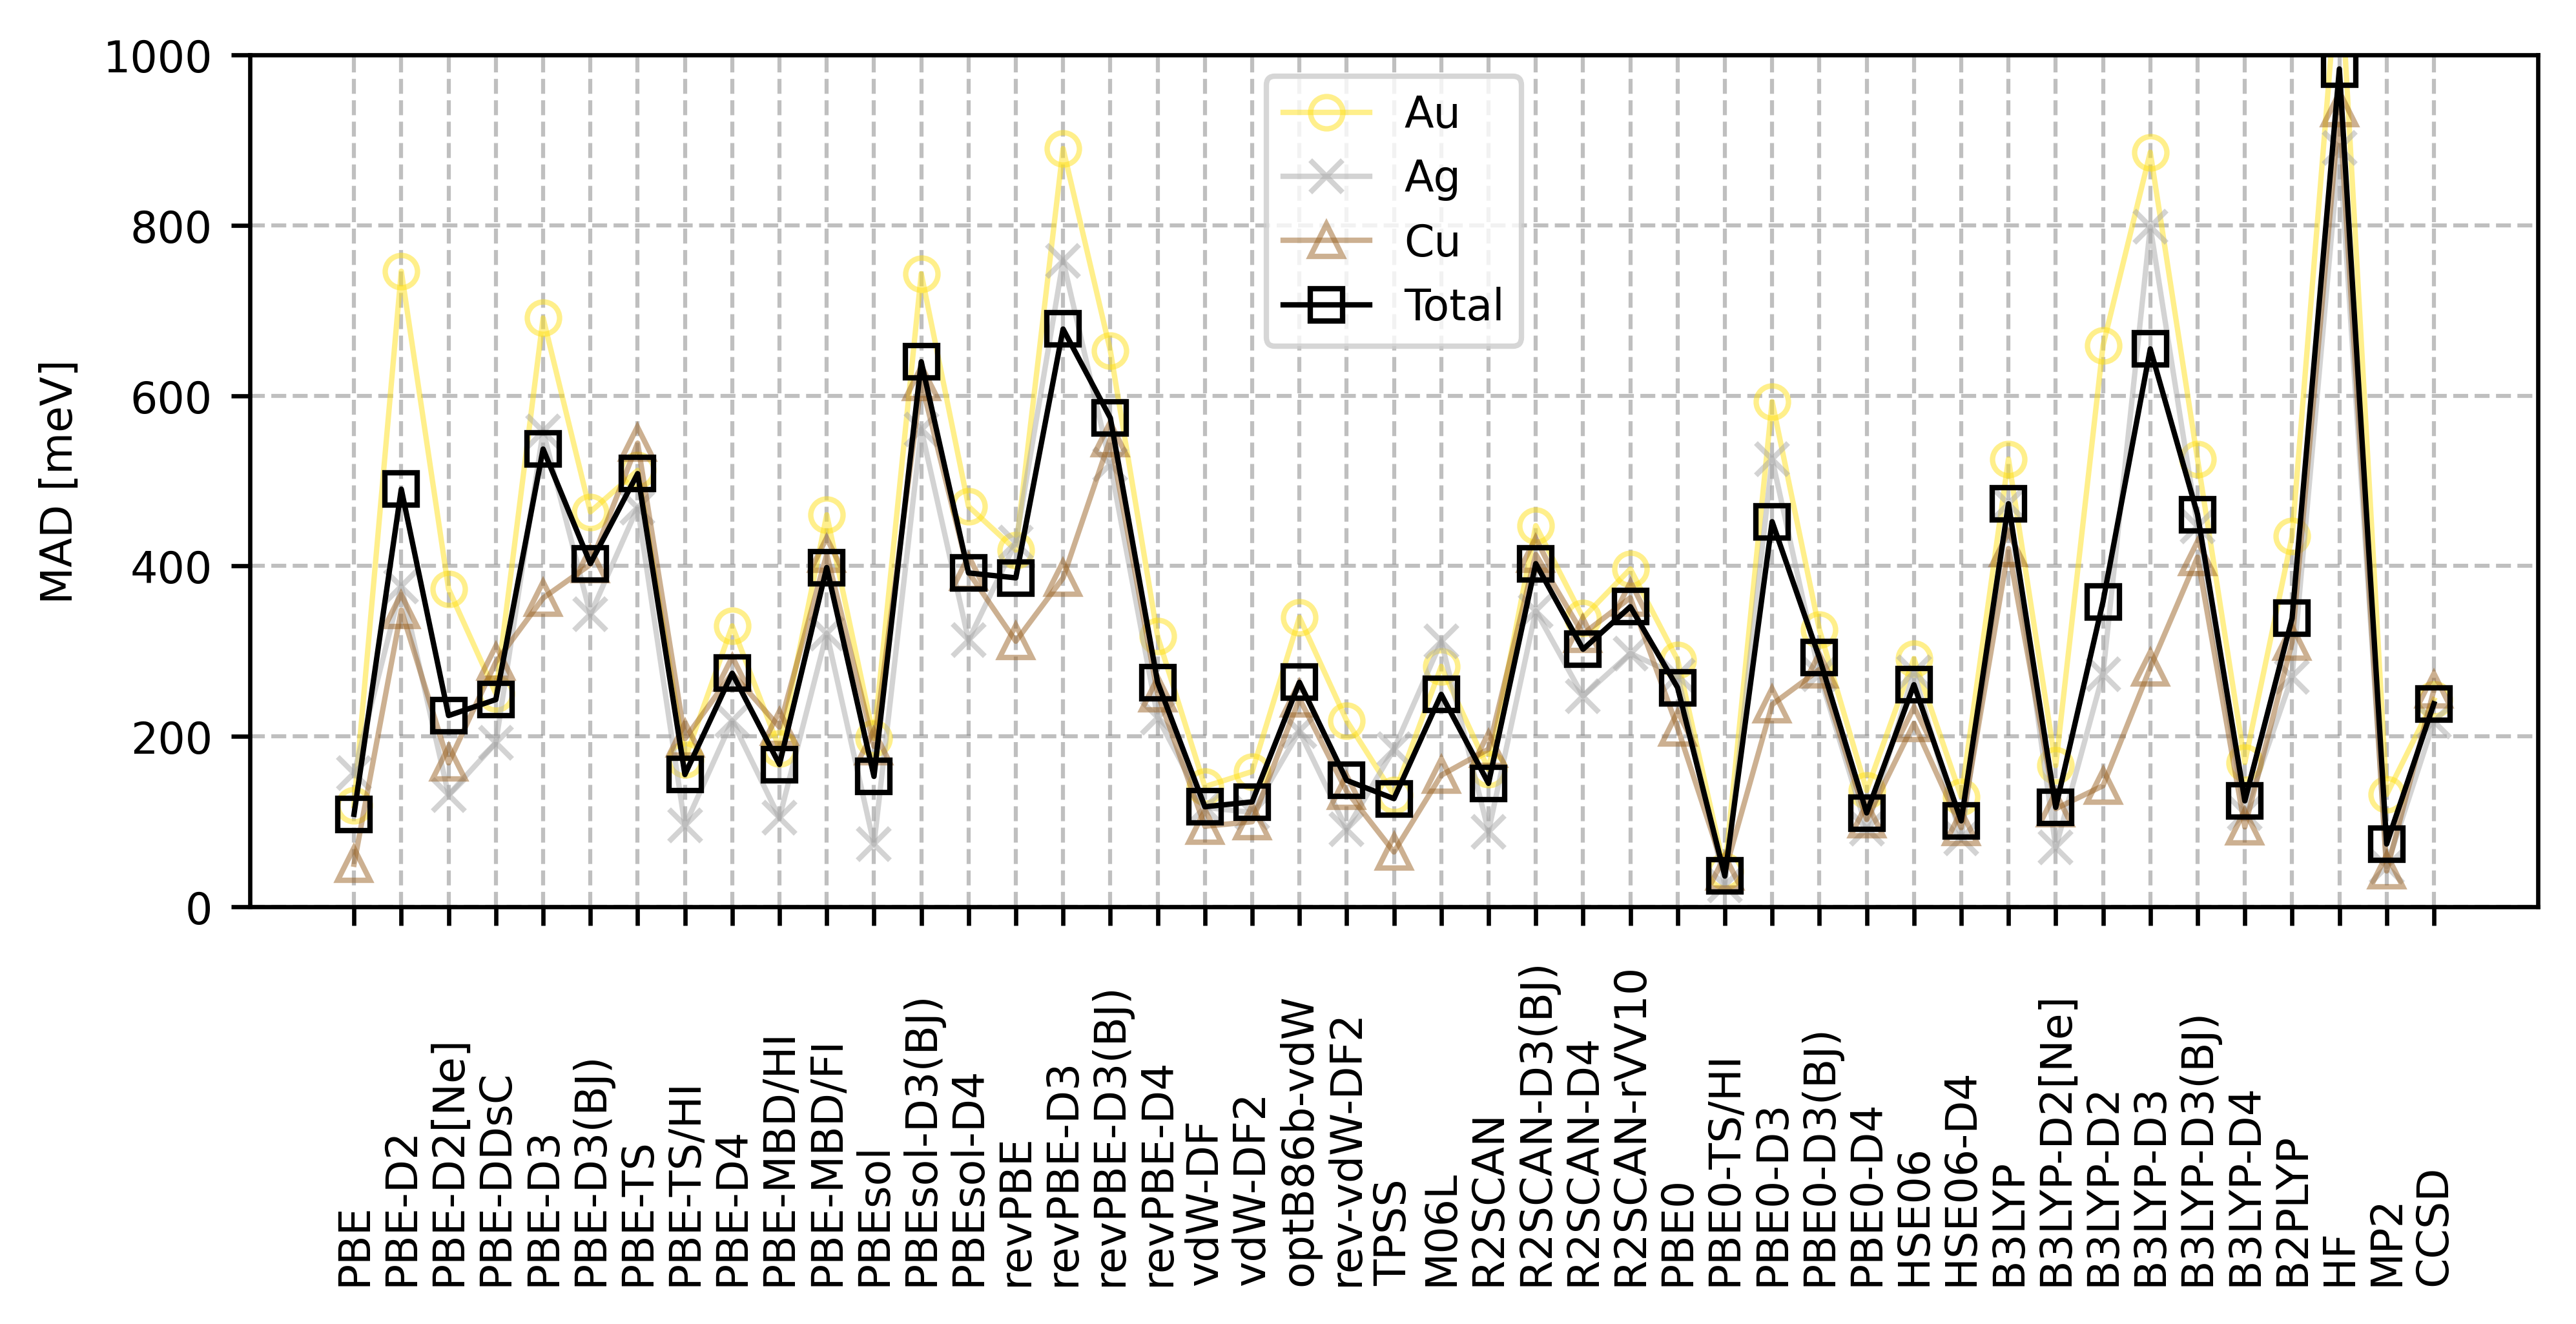

In [57]:
fig, axs = plt.subplots(figsize=(6.69,3.5),dpi=600, sharey=True,sharex=True,tight_layout=True)


method_sorted_list = full_methods_list[:-1].copy()

width=0.35

counter = 0
axs.plot(np.array(list(range(len(method_sorted_list)))), [ (m2_mgo_xc_bind_ene_mad['Au']['Total'][x]) for x in method_sorted_list], marker='o',markeredgewidth=1.0, markerfacecolor="None",color=color_dict['yellow'], linewidth=1,label='Au',alpha=0.5)
axs.plot(np.array(list(range(len(method_sorted_list)))), [ (m2_mgo_xc_bind_ene_mad['Ag']['Total'][x]) for x in method_sorted_list], marker='x',markeredgewidth=1.0, markerfacecolor="None",color=color_dict['grey'], linewidth=1,label='Ag',alpha=0.5)
axs.plot(np.array(list(range(len(method_sorted_list)))), [ (m2_mgo_xc_bind_ene_mad['Cu']['Total'][x]) for x in method_sorted_list], marker='^',markeredgewidth=1.0, markerfacecolor="None",color=color_dict['brown'], linewidth=1,label='Cu',alpha=0.5)
axs.plot(np.array(list(range(len(method_sorted_list)))), [ (m2_mgo_xc_bind_ene_mad['Total']['Total'][x]) for x in method_sorted_list], marker='s',markeredgewidth=1.0, markerfacecolor="None",color=color_dict['black'], linewidth=1,label='Total')

axs.legend()

if usetex == True:
    method_sorted_list[24] = r'r\textsuperscript{2}SCAN'
    method_sorted_list[25] = r'r\textsuperscript{2}SCAN-D3'
    method_sorted_list[26] = r'r\textsuperscript{2}SCAN-D4'
    method_sorted_list[27] = r'r\textsuperscript{2}SCAN-rVV10'


axs.set_xticks(np.array(list(range(len(method_sorted_list)))))
axs.set_xticklabels(method_sorted_list,rotation=90,va='bottom',y=-0.4)

axs.set_ylim([0,1000])

axs.set_ylabel('MAD [meV]')

axs.grid(color = 'grey', linestyle = '--', linewidth = 0.75,alpha=0.5)

plt.savefig('Figures/Fig_S7.png')

<a id='fig2'></a>
## Figure 2 - Combination of the Gas-phase metal-metal MAD and dimer on MgO metal-support MAD

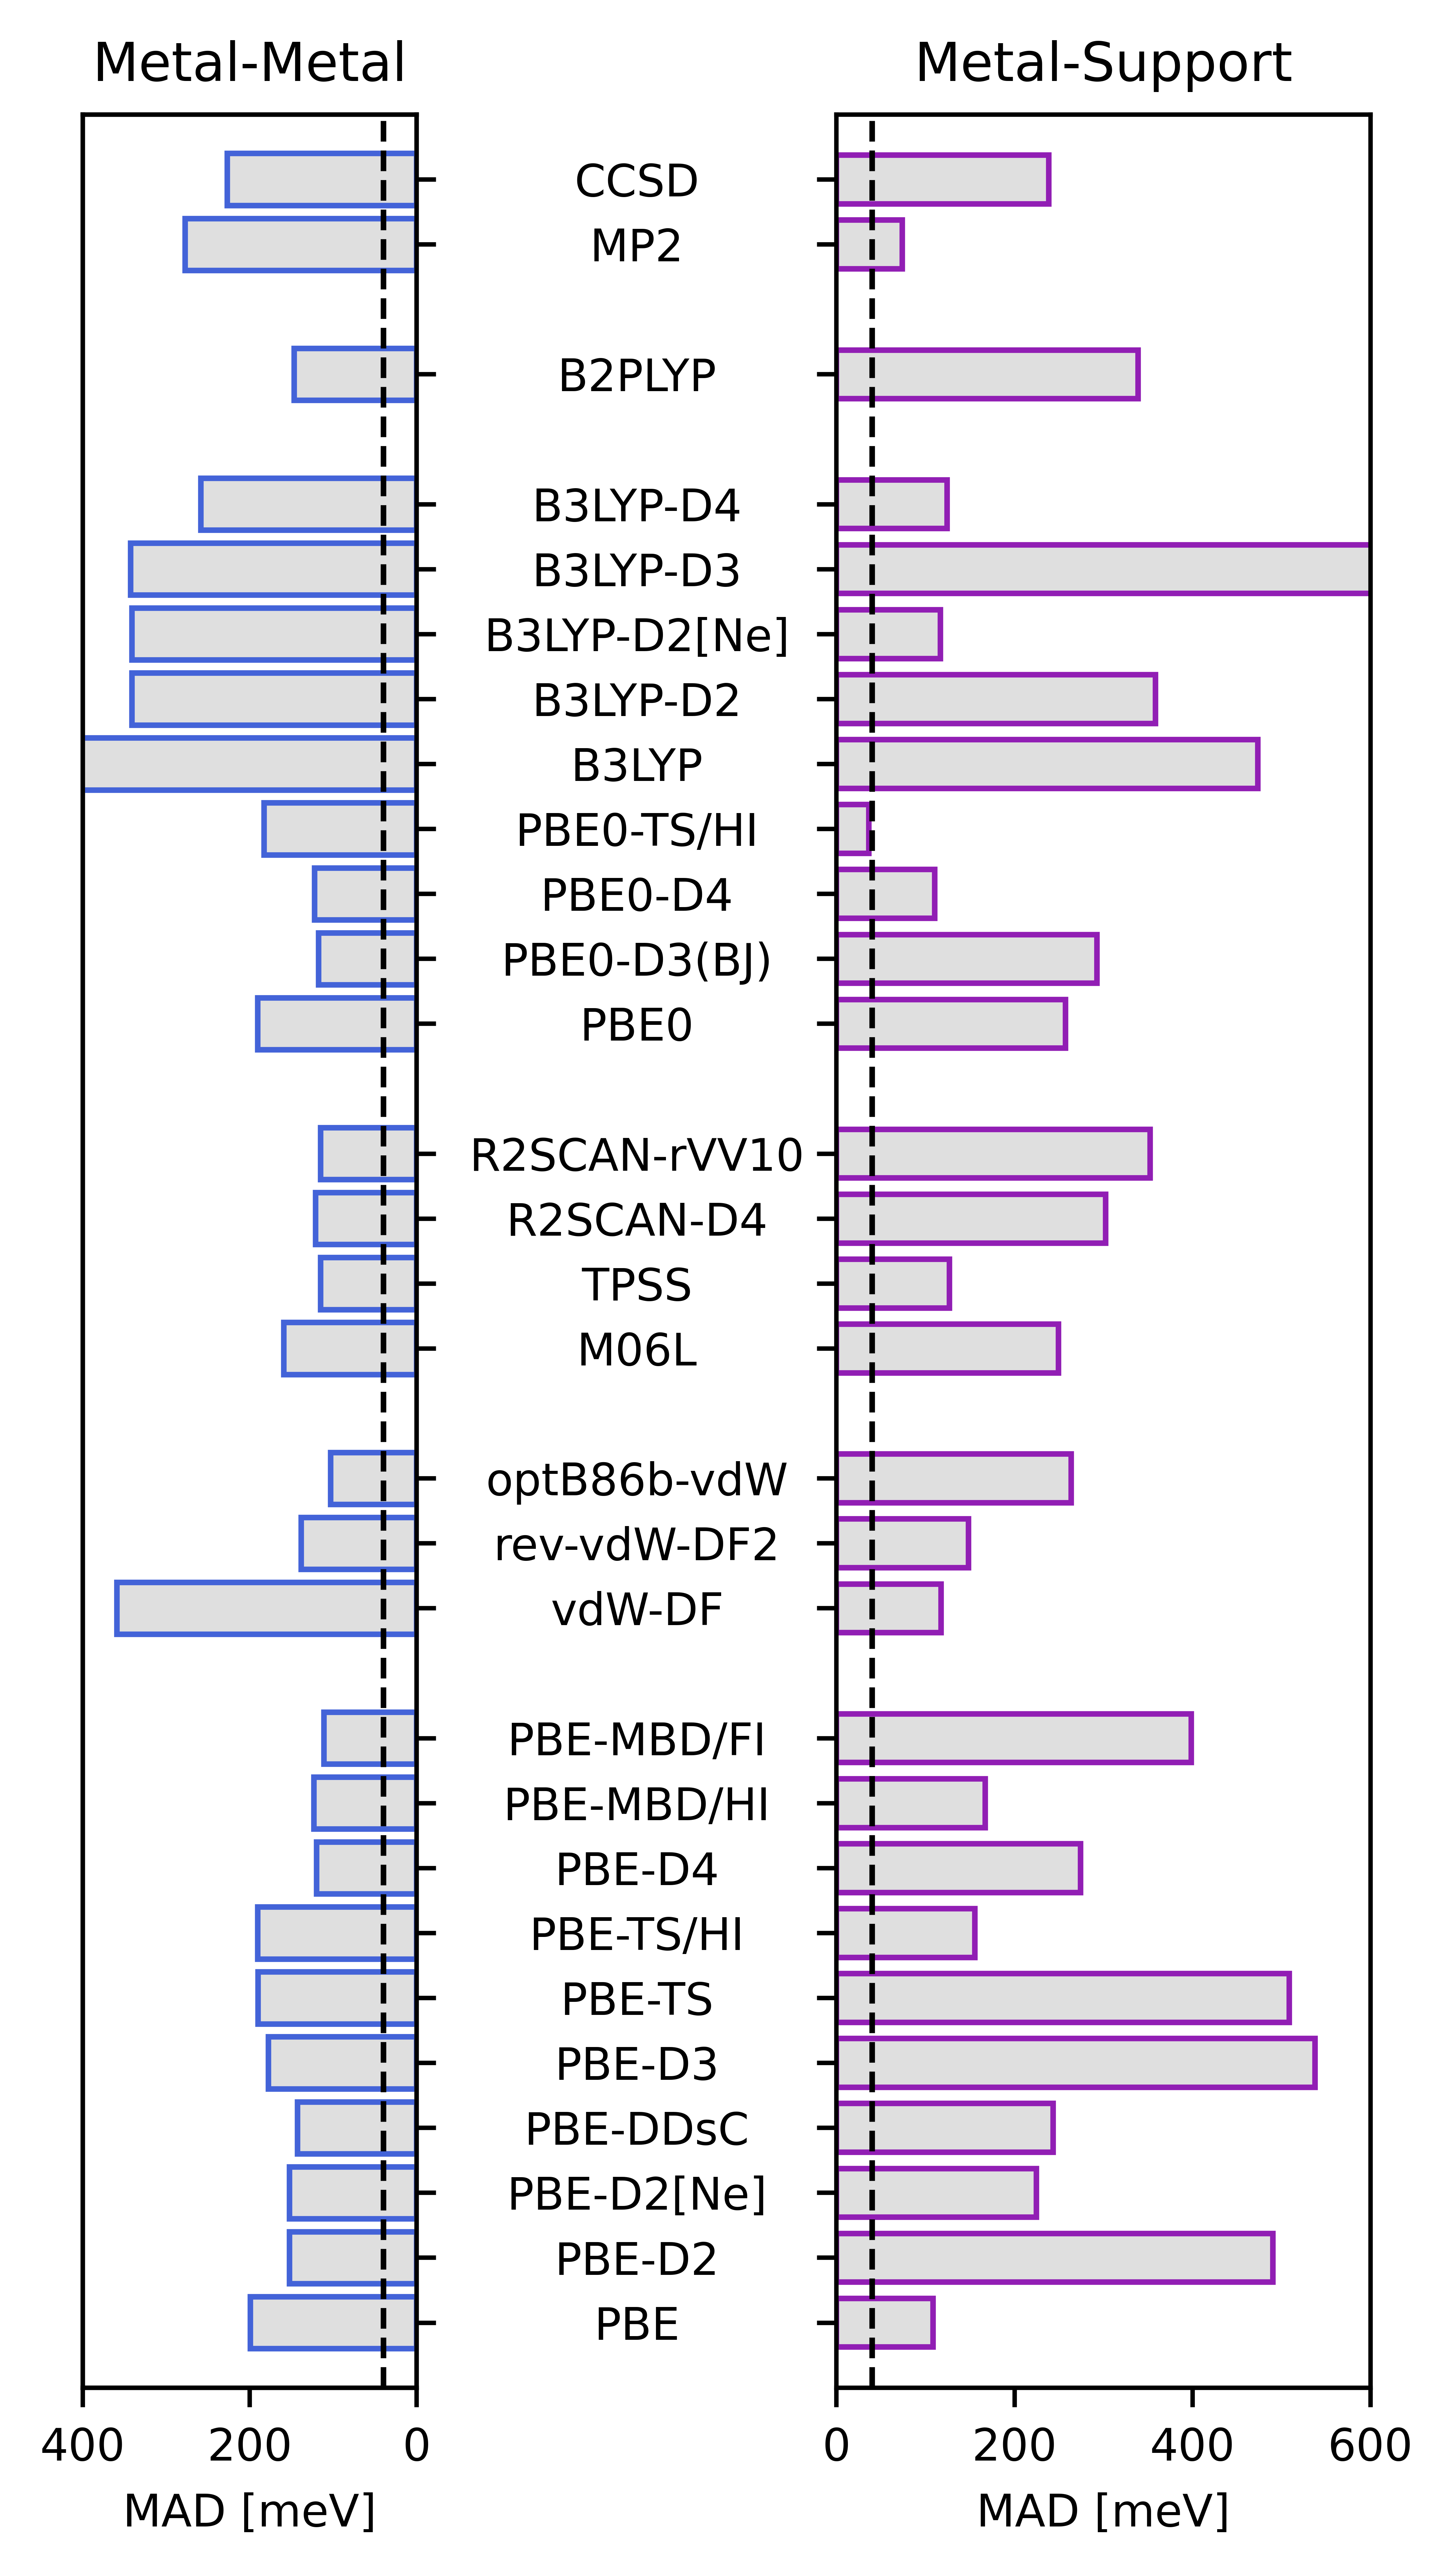

In [58]:
mm_to_inch=0.0393701

fig, axs = plt.subplots(1,2,figsize=(89*mm_to_inch,160*mm_to_inch),dpi=1200, gridspec_kw={'width_ratios': [1, 1.6]}, constrained_layout=True)

gga_xc_list = ['PBE','PBE-D2','PBE-D2[Ne]','PBE-DDsC','PBE-D3','PBE-TS','PBE-TS/HI','PBE-D4','PBE-MBD/HI','PBE-MBD/FI']
vdw_inc_xc_list = ['vdW-DF','rev-vdW-DF2','optB86b-vdW']
metagga_xc_list = ['M06L','TPSS','R2SCAN-D4','R2SCAN-rVV10']
hybrid_xc_list = ['PBE0','PBE0-D3(BJ)','PBE0-D4','PBE0-TS/HI','B3LYP','B3LYP-D2','B3LYP-D2[Ne]','B3LYP-D3','B3LYP-D4']
dh_xc_list = ['B2PLYP']

cwft_xc_list = ['MP2','CCSD']

method_sorted_list = gga_xc_list + vdw_inc_xc_list + metagga_xc_list + hybrid_xc_list + dh_xc_list + cwft_xc_list
method_sorted_list_val = np.concatenate((np.arange(len(gga_xc_list)), 11 + np.arange(len(vdw_inc_xc_list)), 15 + np.arange(len(metagga_xc_list)), 20 + np.arange(len(hybrid_xc_list)), 30 + np.arange(len(dh_xc_list)), 32+ np.arange(len(cwft_xc_list))))


width = 0.5

ax1 = axs[0].twinx()

ax1.barh(method_sorted_list_val*2, [(xc_rel_ene_mad['Total']['Total'][x]) for x in method_sorted_list],1.6, linewidth=1,color='grey',edgecolor='none',alpha=0.25)

ax1.barh(method_sorted_list_val*2, [(xc_rel_ene_mad['Total']['Total'][x]) for x in method_sorted_list],1.6, linewidth=1,color='none',edgecolor=color_dict['blue'])
ax1.plot([40,40],[-2,68],color='black',linestyle='--',linewidth=1)

axs[1].barh(method_sorted_list_val*2, [m2_mgo_xc_bind_ene_mad['Total']['Total'][x] for x in method_sorted_list],1.5, linewidth=1, color='grey',edgecolor='none',alpha=0.25)
axs[1].barh(method_sorted_list_val*2, [m2_mgo_xc_bind_ene_mad['Total']['Total'][x] for x in method_sorted_list],1.5, linewidth=1, color='none',edgecolor=color_dict['purple'])
axs[1].plot([40,40],[-2,68],color='black',linestyle='--',linewidth=1)


ax1.set_yticks(method_sorted_list_val*2)
ax1.set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_yticklabels([])
axs[1].set_yticks(method_sorted_list_val*2)

axs[0].set_title('Metal-Metal')
axs[1].set_title('Metal-Support')
axs[0].set_xlabel('MAD [meV]')
axs[1].set_xlabel('MAD [meV]')

if usetex == True:
    method_sorted_list[15] = r'r\textsuperscript{2}SCAN-D4'
    method_sorted_list[16] = r'r\textsuperscript{2}SCAN-rVV10'


axs[1].set_yticklabels(method_sorted_list,ha='center',position=(-0.3,0))
ax1.set_xlabel('MAD [meV]')
# axs[1].legend(loc='lower center', bbox_to_anchor=(-0.37, -0.1),frameon=False)
ax1.set_xlim([400,0])
axs[1].set_xlim([0,600])

ax1.set_ylim([-2,68])
axs[1].set_ylim([-2,68])

plt.savefig('Figures/Fig_2ab.png')


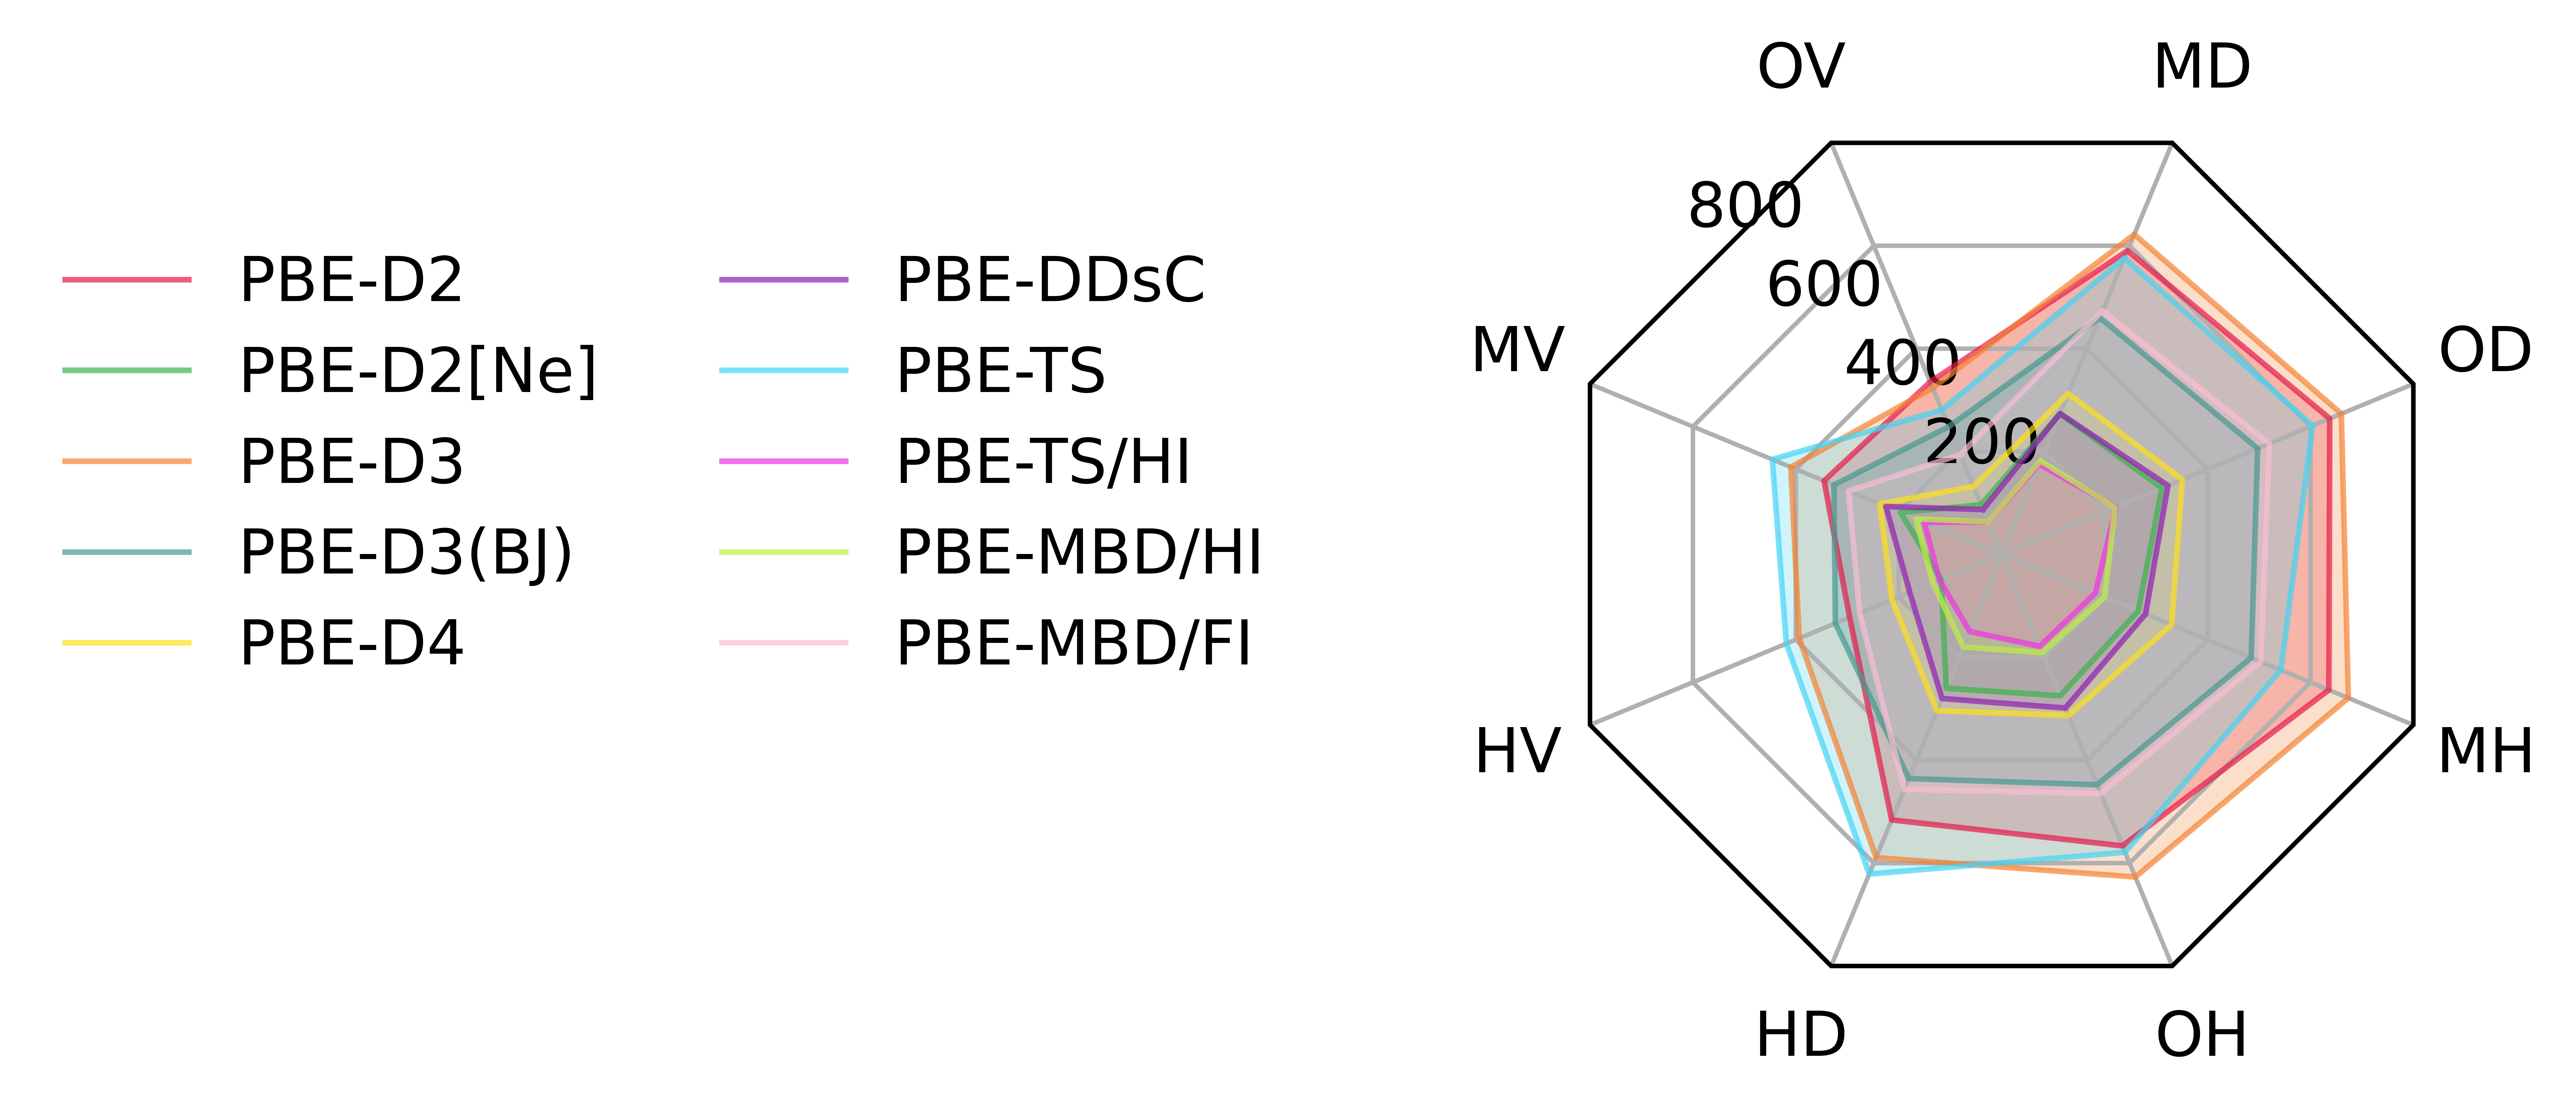

In [59]:
# Calculating the spider plot comparing various dispersion corrections across the 

dimer={0: 'OV', 1: 'MV', 2: 'HV', 3: 'HD',
       4: 'OH', 5: 'MH', 6: 'OD', 7: 'MD'
      }


def example_data():
    data = [
        [dimer[0], dimer[1], dimer[2], dimer[3], 
         dimer[4], dimer[5], dimer[6], dimer[7]],
        ('PBE+vdW empirical', [
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-D2'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-D2[Ne]'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-D3'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-D3(BJ)'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-D4'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-DDsC'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-TS'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-TS/HI'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-MBD/HI'] for x in list(range(1,9))],
            [m2_mgo_xc_bind_ene_mad['Total'][x]['PBE-MBD/FI'] for x in list(range(1,9))]
        ])
    ]
    return data

N = 8
theta = radar_factory(N, frame='polygon',rotation=5*np.pi/8)

data = example_data()
spoke_labels = data.pop(0)

fig, axs = plt.subplots(figsize=(89*mm_to_inch,70*mm_to_inch),dpi=1200,subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

axs.set_rgrids([200,400,600,800])
colors = ['C1', 'C2', 'C3', 'C10','C4', 'C5', 'C6', 'C7', 'C8','C9']


for index, i in enumerate(['PBE-D2', 'PBE-D2[Ne]', 'PBE-D3', 'PBE-D3(BJ)','PBE-D4','PBE-DDsC', 'PBE-TS', 'PBE-TS/HI', 'PBE-MBD/HI','PBE-MBD/FI']):
    if 'TSHI' in i:
        axs.plot(theta, [m2_mgo_xc_bind_ene_mad['Total'][x][i] for x in list(range(1,9))],'--',color=colors[index],linewidth=1)
        axs.fill(theta, [m2_mgo_xc_bind_ene_mad['Total'][x][i] for x in list(range(1,9))], facecolor=colors[index], alpha=0.25, label='_nolegend_')
    else:
        axs.plot(theta, [m2_mgo_xc_bind_ene_mad['Total'][x][i] for x in list(range(1,9))],color=colors[index],linewidth=1, alpha=0.7)
        axs.fill(theta, [m2_mgo_xc_bind_ene_mad['Total'][x][i] for x in list(range(1,9))], facecolor=colors[index], alpha=0.25, label='_nolegend_')            

axs.set_varlabels(spoke_labels)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


# add legend relative to top-left plot
labels = ('PBE-D2', 'PBE-D2[Ne]', 'PBE-D3', 'PBE-D3(BJ)','PBE-D4','PBE-DDsC', 'PBE-TS', 'PBE-TS/HI', 'PBE-MBD/HI', 'PBE-MBD/FI')
legend = axs.legend(labels,ncol=2, fontsize=11,loc='lower center', bbox_to_anchor=(-1, 0.3),frameon=False) 

plt.ylim([0.0,800])
plt.savefig('Figures/Fig_2c.png',dpi=1200,bbox_inches = "tight")

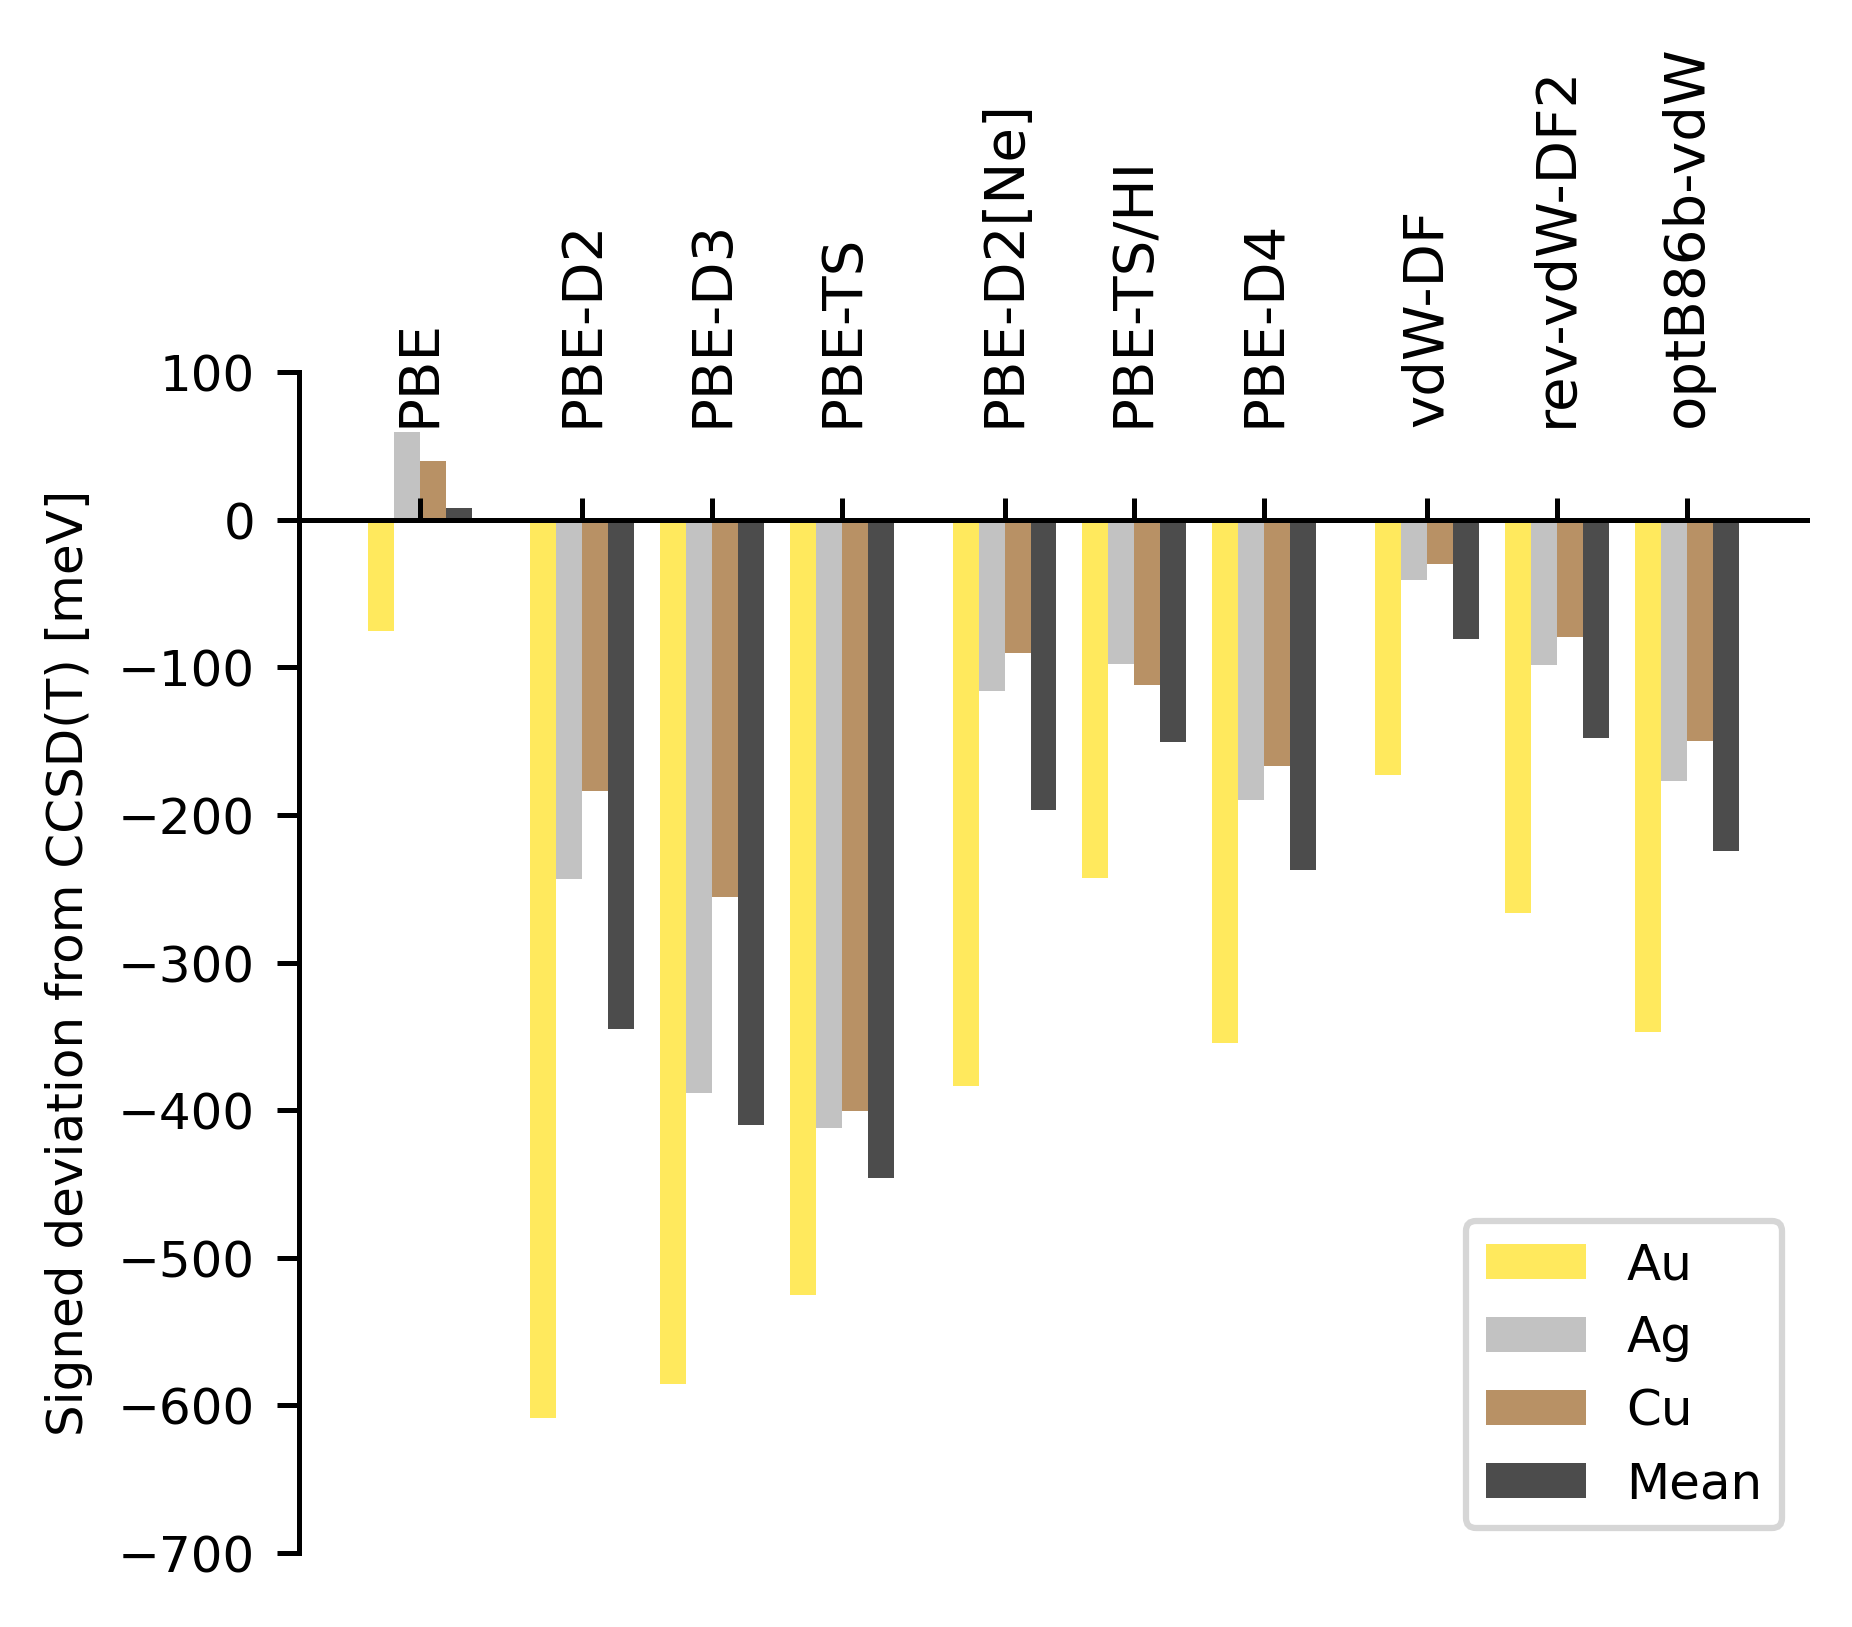

In [60]:
# Your data and lists
gga_xc_list = ['PBE']
gga_overestimate_c6_xc_list = ['PBE-D2','PBE-D3','PBE-TS']
gga_good_c6_xc_list = ['PBE-D2[Ne]','PBE-TS/HI','PBE-D4']
vdw_inc_xc_list = ['vdW-DF','rev-vdW-DF2','optB86b-vdW']

eov_method_sorted_list = gga_xc_list + gga_overestimate_c6_xc_list + gga_good_c6_xc_list + vdw_inc_xc_list 
eov_method_sorted_list_val = np.concatenate((np.arange(len(gga_xc_list)), 1.25 + np.arange(len(gga_overestimate_c6_xc_list)), 4.5 + np.arange(len(gga_good_c6_xc_list)), 7.75 + np.arange(len(vdw_inc_xc_list))))

fig, axs = plt.subplots(figsize=(4,3.5),dpi=450, constrained_layout=True)

width = 0.5

# Assuming you have the data in m2_mgo_xc_bind_ene_msd
# Your bar plotting code 
axs.bar(eov_method_sorted_list_val*2.5, [m2_mgo_xc_bind_ene_msd['Au'][2][x] for x in eov_method_sorted_list], 0.5, label=r'Au', alpha=0.7, color=color_dict['yellow'])
axs.bar(eov_method_sorted_list_val*2.5 + 0.5, [m2_mgo_xc_bind_ene_msd['Ag'][2][x] for x in eov_method_sorted_list], 0.5, label=r'Ag', alpha=0.7, color=color_dict['grey'])
axs.bar(eov_method_sorted_list_val*2.5 + 1, [m2_mgo_xc_bind_ene_msd['Cu'][2][x] for x in eov_method_sorted_list], 0.5, label=r'Cu', alpha=0.7, color=color_dict['brown'])
axs.bar(eov_method_sorted_list_val*2.5 + 1.5, [m2_mgo_xc_bind_ene_msd['Total'][2][x] for x in eov_method_sorted_list], 0.5, label=r'Mean', alpha=0.7, color=color_dict['black'])

axs.set_xticks(eov_method_sorted_list_val*2.5 + 0.75)

axs.spines["bottom"].set_position(("data", 0))

axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.legend()
axs.tick_params(axis="x", direction="in",pad=-15)
axs.set_xticklabels(eov_method_sorted_list,rotation=90, va='bottom',fontsize=9)
axs.set_ylabel('Signed deviation from CCSD(T) [meV]')

axs.set_ylim([-700,100])
plt.savefig('Figures/Fig_S9.png')


<a id='figs6'></a>
## Benchmarking &Delta;CC approach in oxide-supported coinage metal tetramers

### Figure 3 and S8 - Comparison of DFT models to SKZCAM protocol and &Delta;CC approach

In [61]:
# Looking at the Au tetramer on MgO system
xc_functional_list = [x for x in dft_functionals][:-5]
full_methods_list = [x for x in dft_functionals]

tetramer_mgo_xc_rel_ene_list = { x:  {z : [] for z in full_methods_list} for x in ['Au','Ag','Cu']}
tetramer_mgo_xc_bind_ene_list = { x:  {z : [] for z in full_methods_list}   for x in ['Au','Ag','Cu']}

tetramer_mgo_xc_rel_ene_mad = { x:  {z : [] for z in full_methods_list}  for x in ['Au','Ag','Cu','Total']}
tetramer_mgo_xc_bind_ene_mad = { x:  {z : [] for z in full_methods_list}  for x in ['Au','Ag','Cu']}


ene_au_clus_dft = []
ene_au_clus_cc = []

for i in ['Au','Ag','Cu']:   
    for j in [1,2,3,4]:
        for k in xc_functional_list:
            func_name = dft_functionals_oxide_name_convert[k]
            a = find_energy('Data/03-M4_MgO/DFT/{0}4/{1}/{2}/AD_SLAB/OUTCAR'.format(i,j,func_name),code_format='vasp')
            a0 = find_energy('Data/03-M4_MgO/DFT/{0}4/1/{1}/AD_SLAB/OUTCAR'.format(i,func_name),code_format='vasp')
            tetramer_mgo_xc_rel_ene_list[i][k] += [(a-a0)*1000]

        ene_hf = []
        ene_mp2 = []
        ene_ccsd = []
        ene_ccsdt = []
        ene_dft = []
        ene_b2plyp = [] 
        for m in [1,3,2]:
            root_folder = 'Data/03-M4_MgO/cWFT/CCSDT/{0}/{1}/{2}/AD_SLAB/mrcc.out'.format(i,j,m)
            root_folder_b2plyp = 'Data/03-M4_MgO/cWFT/B2PLYP/{0}/{1}/{2}/mrcc.out'.format(i,j,m)

            ene_hf += [find_energy(root_folder,code_format='mrcc',typ='hf')]
            ene_mp2 += [find_energy(root_folder,code_format='mrcc',typ='lmp2')]
            ene_ccsd += [find_energy(root_folder,code_format='mrcc',typ='lccsd')]
            ene_ccsdt += [find_energy(root_folder,code_format='mrcc',typ='lccsdt')]
            ene_dft += [find_energy(root_folder_b2plyp,code_format='mrcc',typ='hf')]
            ene_b2plyp += [find_energy(root_folder_b2plyp,code_format='mrcc',typ='B2PLYP')]


        dummy_dict ={
            'MP2': extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False),
            'CCSD': extrapolate.get_cbs(ene_hf[0],ene_ccsd[0],ene_hf[1],ene_ccsd[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False),
            'CCSD(T)': extrapolate.get_cbs(ene_hf[0],ene_ccsdt[0],ene_hf[1],ene_ccsdt[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False),
            'B2PLYP': extrapolate.get_cbs(ene_dft[0],ene_b2plyp[0],ene_dft[1],ene_b2plyp[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False)
        }
        tetramer_mgo_xc_bind_ene_list[i]['HF'] += [dummy_dict['MP2'][0]]
        tetramer_mgo_xc_bind_ene_list[i]['MP2'] += [dummy_dict['MP2'][-1] + ene_mp2[-1] - ene_mp2[0]]
        tetramer_mgo_xc_bind_ene_list[i]['CCSD'] += [dummy_dict['CCSD'][-1] + ene_ccsd[-1] - ene_ccsd[0]]
        tetramer_mgo_xc_bind_ene_list[i]['CCSD(T)'] += [dummy_dict['CCSD(T)'][-1] + ene_ccsdt[-1] - ene_ccsdt[0]]
        tetramer_mgo_xc_bind_ene_list[i]['B2PLYP'] += [dummy_dict['B2PLYP'][-1] + ene_b2plyp[-1] - ene_b2plyp[0]]

        for m in ['HF','MP2','CCSD','CCSD(T)','B2PLYP']:
            tetramer_mgo_xc_rel_ene_list[i][m] += [(tetramer_mgo_xc_bind_ene_list[i][m][-1]- tetramer_mgo_xc_bind_ene_list[i][m][0])*1000*Hartree]

        ene_hf = []
        ene_ccsdt = []
        
        for m in [1,3,2]:
            root_folder = 'Data/03-M4_MgO/cWFT/CCSDT/Cluster_Corr/{0}/{1}/{2}/mrcc.out'.format(i,j,m)

            ene_hf += [find_energy(root_folder,code_format='mrcc',typ='hf')]
            ene_ccsdt += [find_energy(root_folder,code_format='mrcc',typ='lccsdt')]

        dummy_dict_cc_clus = extrapolate.get_cbs(ene_hf[0],ene_ccsdt[0],ene_hf[1],ene_ccsdt[1],X=3,Y=4,family='mixcc',\
            convert_Hartree=False ,shift=0.0,output=False)
        
        if j == 1:
            ene_clus_cc0 = (dummy_dict_cc_clus[-1] + ene_ccsdt[-1] - ene_ccsdt[0])*Hartree*1000

        ene_clus_cc = (dummy_dict_cc_clus[-1] + ene_ccsdt[-1] - ene_ccsdt[0])*Hartree*1000 
        ene_clus_cc_delta = ene_clus_cc - ene_clus_cc0
        for k in (xc_functional_list): # ['PBE','vdW-DF','R2SCAN','PBE0-TSHI']:
            func_name = dft_functionals_gas_name_convert[k]

            if j == 1:
                tetramer_mgo_xc_rel_ene_list[i]['{0}+CC'.format(k)] = []
                tetramer_mgo_xc_rel_ene_mad[i]['{0}+CC'.format(k)] = 0

            a = find_energy('Data/03-M4_MgO/DFT/{0}4/{1}/{2}/AD/OUTCAR'.format(i,j,func_name),code_format='vasp')
            a0 = find_energy('Data/03-M4_MgO/DFT/{0}4/1/{1}/AD/OUTCAR'.format(i,func_name),code_format='vasp')
            ene_clus_delta_pbe0tshi = (a-a0)*1000
            # These next few lines are just so that I can plot the schematic in Fig. 3 of the main text
            if k == 'PBE':
                ene_au_clus_dft += [ene_clus_delta_pbe0tshi]
                ene_au_clus_cc += [ene_clus_cc_delta]
            delta_correction = ene_clus_cc_delta - ene_clus_delta_pbe0tshi
            tetramer_mgo_xc_rel_ene_list[i]['{0}+CC'.format(k)] += [tetramer_mgo_xc_rel_ene_list[i][k][-1] + delta_correction]

for j in tetramer_mgo_xc_rel_ene_list['Au']: #xc_functional_list + ['B2PLYP','HF','MP2','CCSD','DFT+CC']:
    for i in ['Au','Ag','Cu']:
        tetramer_mgo_xc_rel_ene_mad[i][j] = np.sum([abs(tetramer_mgo_xc_rel_ene_list[i][j][l] - tetramer_mgo_xc_rel_ene_list[i]['CCSD(T)'][l]) for l in list(range(1,4))])/3
    

    tetramer_mgo_xc_rel_ene_mad['Total'][j] = np.sum([tetramer_mgo_xc_rel_ene_mad[l][j] for l in ['Au','Ag','Cu']])/3


In [62]:
tetramer_mgo_xc_rel_ene_mad['Total']

{'PBE': 165.4628395225701,
 'PBE-D2': 191.92066584177334,
 'PBE-D2[Ne]': 70.24399650271985,
 'PBE-DDsC': 132.62807182735773,
 'PBE-D3': 268.0111432544335,
 'PBE-D3(BJ)': 151.35391849391786,
 'PBE-TS': 149.11521554266417,
 'PBE-TS/HI': 109.70474782187375,
 'PBE-D4': 127.38770627176899,
 'PBE-MBD/HI': 109.55315417245089,
 'PBE-MBD/FI': 219.10788849395564,
 'PBEsol': 74.32954514419636,
 'PBEsol-D3(BJ)': 141.44908400168168,
 'PBEsol-D4': 73.28675280990181,
 'revPBE': 245.4404250781207,
 'revPBE-D3': 455.55449436552504,
 'revPBE-D3(BJ)': 251.99557849398272,
 'revPBE-D4': 198.69948293833082,
 'vdW-DF': 248.01140647788785,
 'vdW-DF2': 316.6684387001153,
 'optB86b-vdW': 100.95428738281582,
 'rev-vdW-DF2': 107.19137033269658,
 'TPSS': 122.09610809539241,
 'M06L': 1035.7869976519667,
 'R2SCAN': 98.92332625530243,
 'R2SCAN-D3(BJ)': 97.04458339951871,
 'R2SCAN-D4': 91.95907806585244,
 'R2SCAN-rVV10': 91.3936978439968,
 'PBE0': 137.19915301033515,
 'PBE0-TS/HI': 70.9491833773989,
 'PBE0-D3': 257.85

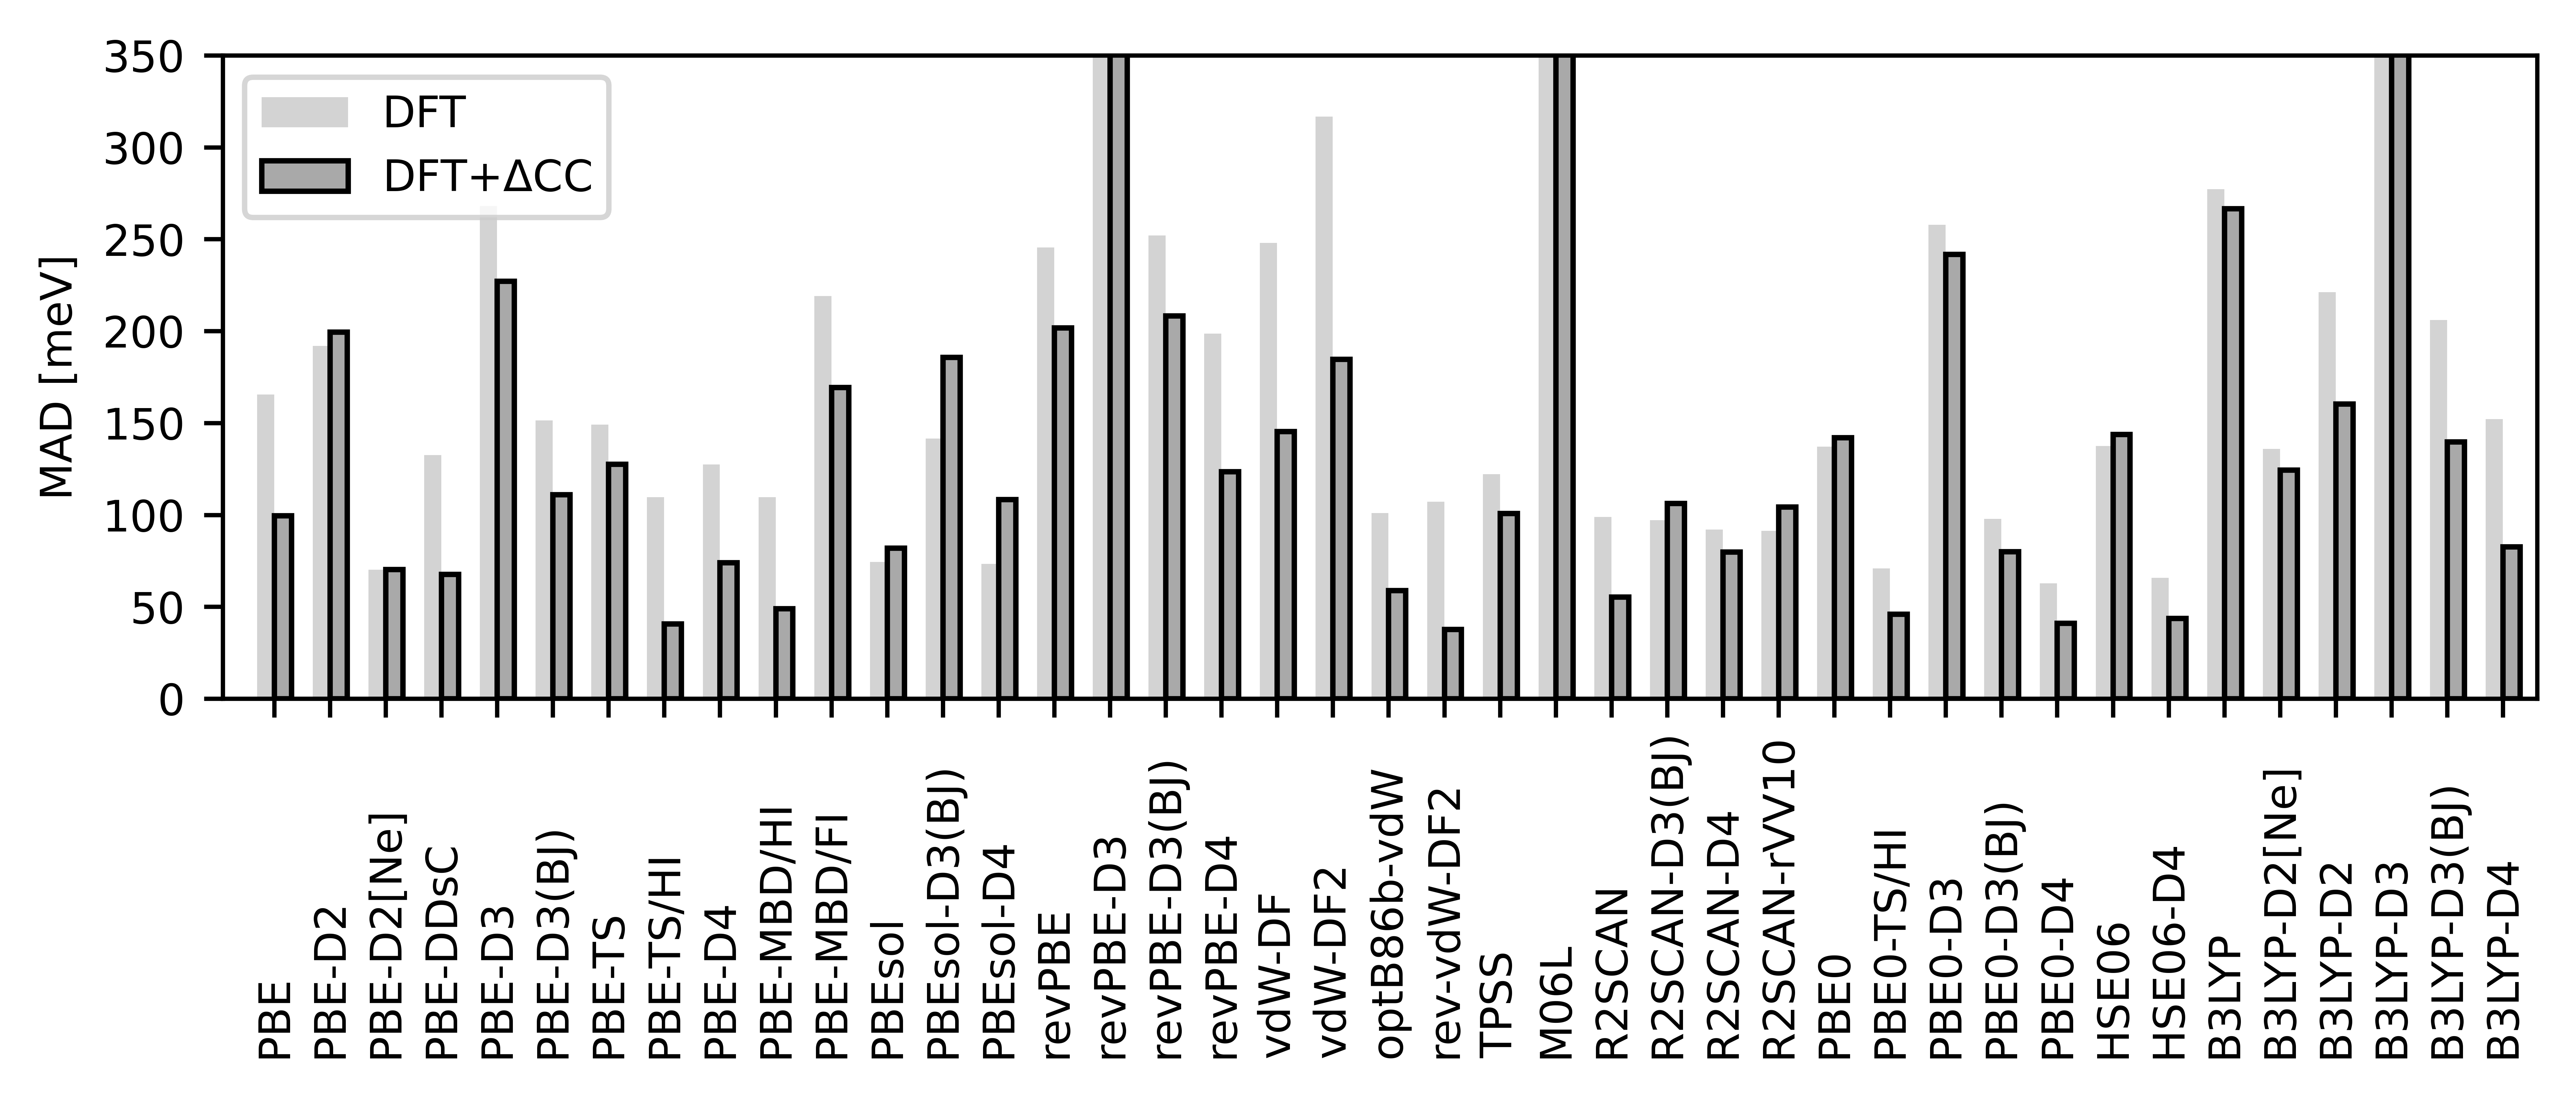

In [63]:
fig, axs = plt.subplots(figsize=(6.67,3),dpi=1200,tight_layout=True)


funct_line = xc_functional_list.copy() 
# funct_line_y = [1,2,3.5,4.5,6,7,8.5,9.5]

xc_tetramer_mad = []
xc_cc_tetramer_mad = [] 

for i in funct_line:
    xc_tetramer_mad += [tetramer_mgo_xc_rel_ene_mad['Total'][i]]
    xc_cc_tetramer_mad += [tetramer_mgo_xc_rel_ene_mad['Total'][i + '+CC']]

xc_list_range = np.arange(len(funct_line))*1.3

# Bar graph of different
# Loop over the functionals and plot the MAD
axs.bar(xc_list_range,xc_tetramer_mad,0.4,color=color_dict['grey'],alpha=0.5,label='DFT')
axs.bar(xc_list_range + 0.4,xc_cc_tetramer_mad,0.4,color=color_dict['grey'],edgecolor='black',alpha=1,label=r'DFT+$\Delta$CC')

if usetex == True:
    funct_line[24] = r'r\textsuperscript{2}SCAN'
    funct_line[25] = r'r\textsuperscript{2}SCAN-D3(BJ)'
    funct_line[26] = r'r\textsuperscript{2}SCAN-D4'
    funct_line[27] = r'r\textsuperscript{2}SCAN-rVV10'    
    # funct_line[2] = r'r\textsuperscript{2}SCAN-D3'
    # funct_line[22] = r'r\textsuperscript{2}SCAN-D4'




axs.set_xticks(xc_list_range+0.2)
axs.set_xticklabels(funct_line,rotation=90,va='bottom',y=-0.5)

axs.set_ylabel('MAD [meV]')
axs.legend()
axs.set_xlim([xc_list_range[0] -1,xc_list_range[-1] + 1])
axs.set_ylim([0,350])

plt.savefig('Figures/Fig_S8.png')

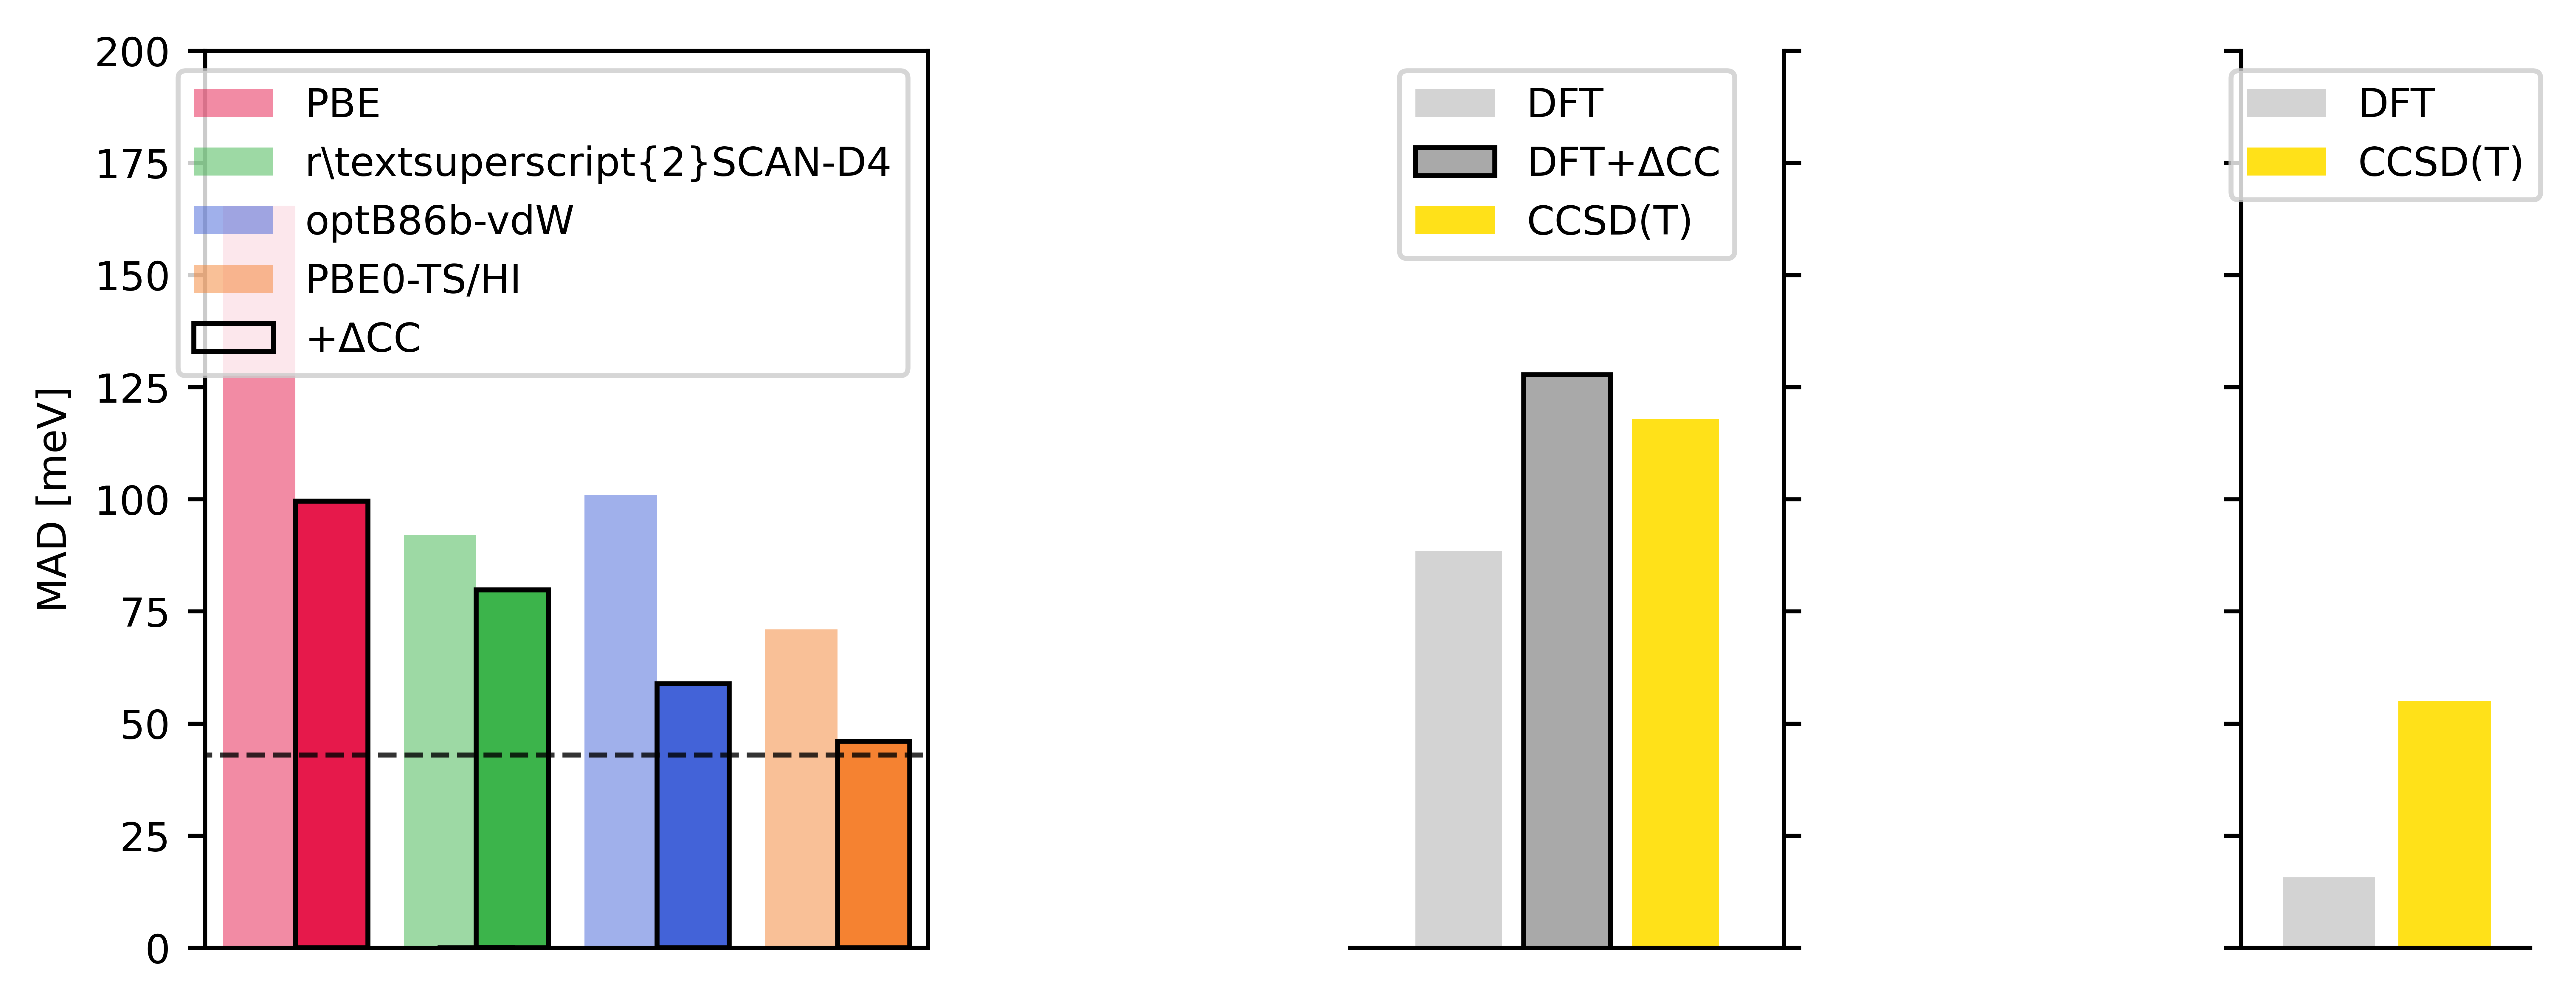

In [64]:
fig, axs = plt.subplots(1,3,figsize=(180*mm_to_inch,2.7),dpi=1200,constrained_layout=True,gridspec_kw={'width_ratios': [5, 3, 2],'wspace': 0.5})


funct_line = ['PBE','R2SCAN-D4','optB86b-vdW','PBE0-TS/HI']
# funct_line_y = [1,2,3.5,4.5,6,7,8.5,9.5]

xc_tetramer_mad = []
xc_cc_tetramer_mad = [] 

for i in funct_line:
    xc_tetramer_mad += [tetramer_mgo_xc_rel_ene_mad['Total'][i]]
    xc_cc_tetramer_mad += [tetramer_mgo_xc_rel_ene_mad['Total'][i + '+CC']]

# Bar graph of different
# Loop over the functionals and plot the MAD
axs[0].bar([1-0.2],xc_tetramer_mad[0],0.4,color=color_dict['red'],alpha=0.5,label='PBE')
axs[0].bar([1+0.2],xc_cc_tetramer_mad[0],0.4,color=color_dict['red'],edgecolor='black',alpha=1)

axs[0].bar([2-0.2],xc_tetramer_mad[1],0.4,color=color_dict['green'],alpha=0.5,label=r'r\textsuperscript{2}SCAN-D4')
axs[0].bar([2+0.2],xc_cc_tetramer_mad[1],0.4,color=color_dict['green'],edgecolor='black',alpha=1)

axs[0].bar([3-0.2],xc_tetramer_mad[2],0.4,color=color_dict['blue'],alpha=0.5,label='optB86b-vdW')
axs[0].bar([3+0.2],xc_cc_tetramer_mad[2],0.4,color=color_dict['blue'],edgecolor='black',alpha=1)

axs[0].bar([4-0.2],xc_tetramer_mad[3],0.4,color=color_dict['orange'],alpha=0.5,label='PBE0-TS/HI')
axs[0].bar([4+0.2],xc_cc_tetramer_mad[3],0.4,color=color_dict['orange'],edgecolor='black',alpha=1)


axs[0].bar([2],[-10],width=0.4,color='none',edgecolor='black',alpha=1, label=r'+$\Delta$CC')


axs[0].plot([0,5],[43,43],'--',color=color_dict['black'],linewidth=1,alpha=0.8)



axs[0].set_xticks([])

axs[0].set_ylabel('MAD [meV]')
axs[0].legend()
# axs[2].set_ylim([10,0.5])
axs[0].set_xlim([0.5,4.5])
axs[0].set_ylim([0,200])


functional_xc_test = 'PBE'

struct_num = 3

gas_phase_ene_au_cc_diff = ene_au_clus_cc[struct_num] - ene_au_clus_cc[0]
gas_phase_ene_au_dft_diff = ene_au_clus_dft[struct_num] - ene_au_clus_dft[0]
deltacc = gas_phase_ene_au_cc_diff - gas_phase_ene_au_dft_diff

oxide_supp_ene_au_cc_diff = tetramer_mgo_xc_rel_ene_list['Au']['CCSD(T)'][struct_num] - tetramer_mgo_xc_rel_ene_list['Au']['CCSD(T)'][0]
oxide_supp_ene_au_dft_diff = tetramer_mgo_xc_rel_ene_list['Au'][functional_xc_test][struct_num] - tetramer_mgo_xc_rel_ene_list['Au'][functional_xc_test][0]


axs[1].bar([1],[oxide_supp_ene_au_dft_diff],width=0.4,color=color_dict['grey'],alpha=0.5, label='DFT')
axs[1].bar([1.5],[oxide_supp_ene_au_dft_diff +  deltacc],width=0.4,color=color_dict['grey'],edgecolor='black', alpha=1.0, label=r'DFT+$\Delta$CC')

axs[1].bar([2],[oxide_supp_ene_au_cc_diff],width=0.4,color=color_dict['yellow'],alpha=1, label='CCSD(T)')




axs[2].bar([3],[gas_phase_ene_au_dft_diff],width=0.4,color=color_dict['grey'],alpha=0.5, label='DFT')

axs[2].bar([3.5],[gas_phase_ene_au_cc_diff],width=0.4,color=color_dict['yellow'],alpha=1, label='CCSD(T)')

axs[1].set_ylim([400,2000])
axs[1].legend(fontsize=8,loc='upper center')

axs[1].yaxis.tick_right()
axs[1].set_yticklabels([])

axs[2].set_yticklabels([])

axs[2].set_ylim([400,2000])
axs[2].legend(fontsize=8,loc='upper center')
axs[1].set_xlim([0.5,2.5])
axs[2].set_xlim([2.62,3.87])

axs[2].set_xticks([])
axs[1].set_xticks([])

axs[1].spines['left'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)

plt.savefig('Figures/Fig_03.png')

<a id='fig4'></a>
## Comparison of DFT models and &Delta;CC approach for Au<sub>20</sub> on MgO

### Figure 4 - Relative energy between 3D and 2D Au<sub>20</sub> structures

In [65]:
xc_functional_list = [x for x in dft_functionals if 'MBD' not in x][:-5]
full_methods_list = [x for x in dft_functionals if 'MBD' not in x]

au20_xc_rel_ene_list = {x: [] for x in xc_functional_list}
ad_xc_rel_ene_list = {x: [] for x in full_methods_list}
au20_xc_deltacc_rel_ene_list = {x: [] for x in xc_functional_list}

dummy_dict = {}

for i in [1,2,3]: #,3]:
    # Step 1. We performed CCSD(T) with a large core on the Mg + Au atoms (i.e. sub-valence s and p electrons are correlated).
    # Step 2. We used MP2 to compute the effect of core electrons to the relative energy ordering.
    # The basis set extrapolation was performed in small core calculation while the correction of LNO thresholds was performed in large core calculation.
    # Doing step 1
    ene_hf_largecore = []
    ene_mp2_largecore = []
    ene_ccsdt_largecore = []
    for m in [1,3,2]:
        root0_largecore_folder = f'Data/04-M20_MgO/CC/1_cheap/{m}/mrcc.out'
        root_largecore_folder = f'Data/04-M20_MgO/CC/{i}_cheap/{m}/mrcc.out'

        ene_hf_largecore += [find_energy(root_largecore_folder,code_format='mrcc',typ='hf') - find_energy(root0_largecore_folder,code_format='mrcc',typ='hf')]
        ene_mp2_largecore += [find_energy(root_largecore_folder,code_format='mrcc',typ='lmp2') - find_energy(root0_largecore_folder,code_format='mrcc',typ='lmp2')]
        ene_ccsdt_largecore += [find_energy(root_largecore_folder,code_format='mrcc',typ='lccsdt') - find_energy(root0_largecore_folder,code_format='mrcc',typ='lccsdt')]
    dummy_dict['CCSD(T) largecore'] = extrapolate.get_cbs(ene_hf_largecore[0],ene_ccsdt_largecore[0],ene_hf_largecore[1],ene_ccsdt_largecore[1],X=3,Y=4,family='mixcc', convert_Hartree=False ,shift=0.0,output=False)[-1]*Hartree*1000
    dummy_dict['MP2 largecore'] = extrapolate.get_cbs(ene_hf_largecore[0],ene_mp2_largecore[0],ene_hf_largecore[1],ene_mp2_largecore[1],X=3,Y=4,family='mixcc', convert_Hartree=False ,shift=0.0,output=False)[-1]*Hartree*1000
    # print(ene_hf_largecore,ene_mp2_largecore,ene_ccsdt_largecore)

    # Doing step 2
    ene_hf_smallcore = []
    ene_hf_largecore = []
    ene_mp2_smallcore = []
    ene_mp2_largecore = []
    for m in [1,3]:
        root0_largecore_folder = f'Data/04-M20_MgO/MP2/1MP2_cheap/{m}/mrcc.out'
        root_largecore_folder = f'Data/04-M20_MgO/MP2/{i}MP2_cheap/{m}/mrcc.out'

        root0_smallcore_folder = f'Data/04-M20_MgO/MP2/1MP2/{m}/mrcc.out'
        root_smallcore_folder = f'Data/04-M20_MgO/MP2/{i}MP2/{m}/mrcc.out'

        ene_hf_largecore += [find_energy(root_largecore_folder,code_format='mrcc',typ='hf') - find_energy(root0_largecore_folder,code_format='mrcc',typ='hf')]
        ene_mp2_largecore += [find_energy(root_largecore_folder,code_format='mrcc',typ='mp2') - find_energy(root0_largecore_folder,code_format='mrcc',typ='mp2')]
        ene_hf_smallcore += [find_energy(root_smallcore_folder,code_format='mrcc',typ='hf') - find_energy(root0_smallcore_folder,code_format='mrcc',typ='hf')]
        ene_mp2_smallcore += [find_energy(root_smallcore_folder,code_format='mrcc',typ='mp2') - find_energy(root0_smallcore_folder,code_format='mrcc',typ='mp2')]

    dummy_dict['CMP2 largecore'] = extrapolate.get_cbs(ene_hf_largecore[0],ene_mp2_largecore[0],ene_hf_largecore[1],ene_mp2_largecore[1],X=3,Y=4,family='mixcc', convert_Hartree=False ,shift=0.0,output=False)[-1]*Hartree*1000
    dummy_dict['MP2 smallcore'] = extrapolate.get_cbs(ene_hf_smallcore[0],ene_mp2_smallcore[0],ene_hf_smallcore[1],ene_mp2_smallcore[1],X=3,Y=4,family='mixcc', convert_Hartree=False ,shift=0.0,output=False)[-1]*Hartree*1000

    ad_xc_rel_ene_list['CCSD(T)'] += [(dummy_dict['CCSD(T) largecore']) + (dummy_dict['MP2 smallcore'] - dummy_dict['MP2 largecore'])]

for i in [1,2,3]:
    for k in xc_functional_list:    
        func_name = dft_functionals_oxide_name_convert[k]
        a1 = find_energy('Data/04-M20_MgO/DFT/1/{0}/AD_SLAB/OUTCAR'.format(func_name),code_format='vasp')
        a2 = find_energy('Data/04-M20_MgO/DFT/{0}/{1}/AD_SLAB/OUTCAR'.format(i,func_name),code_format='vasp')
        au20_xc_rel_ene_list[k] += [(a2-a1)*1000]

        a1 = find_energy('Data/04-M20_MgO/DFT/1/{0}/AD/OUTCAR'.format(func_name),code_format='vasp')
        a2 = find_energy('Data/04-M20_MgO/DFT/{0}/{1}/AD/OUTCAR'.format(i,func_name),code_format='vasp')
        ad_xc_rel_ene_list[k] += [(a2-a1)*1000]
        

for i in [1,2,3]:
    for k in xc_functional_list:
        cc_corr = ad_xc_rel_ene_list['CCSD(T)'][i-1] - ad_xc_rel_ene_list[k][i-1]
        au20_xc_deltacc_rel_ene_list[k] += [au20_xc_rel_ene_list[k][i-1] + cc_corr]


/home/cwmyung/anaconda3/envs/intelpython/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparency" which is no longer supported as of 3.3 and will become an error in 3.6


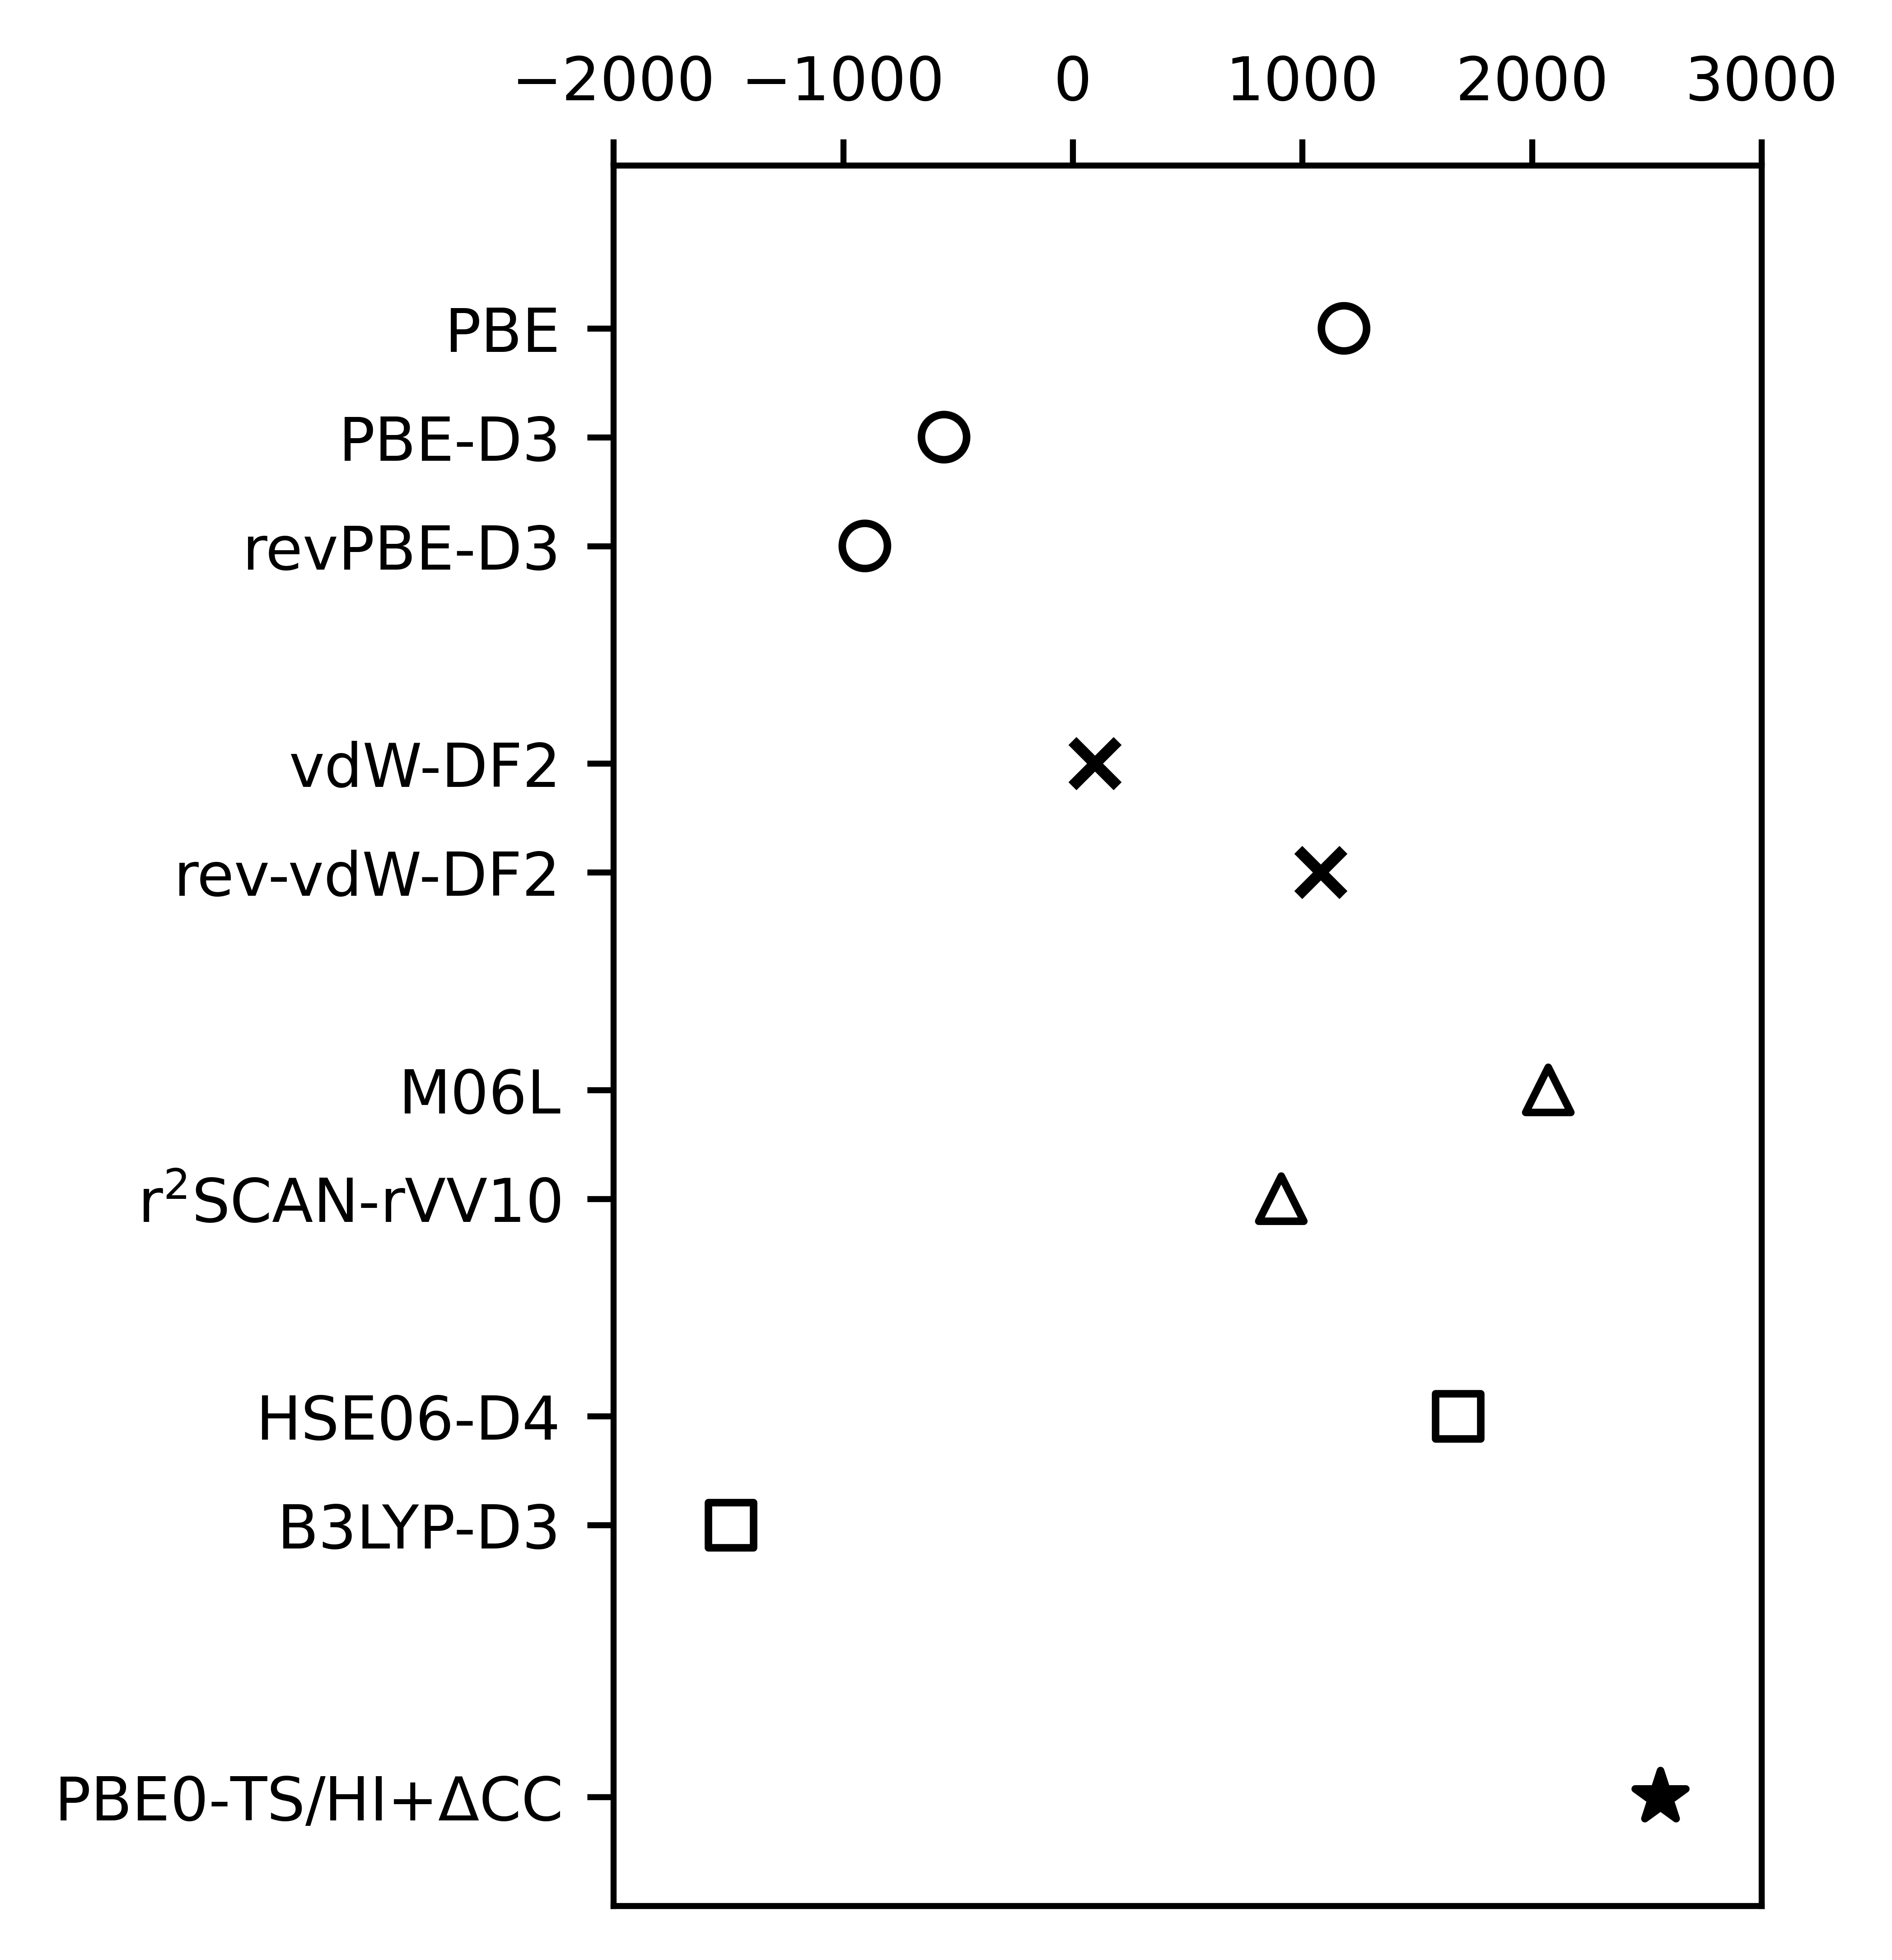

In [66]:
func_list_ordered = ['PBE','PBE-D3','revPBE-D3','vdW-DF2','rev-vdW-DF2','M06L','R2SCAN-rVV10','HSE06-D4','B3LYP-D3']
func_list_ene_ordered = []
func_list_val_ordered = [0,1,2,4,5,7,8,10,11]

for i in func_list_ordered:
    func_list_ene_ordered += [au20_xc_rel_ene_list[i][1]]

fig, axs = plt.subplots(figsize=(3.375,3.5),dpi=1200,constrained_layout=True)

axs.scatter(func_list_ene_ordered[:3],func_list_val_ordered[:3],marker='o',color=color_dict['black'],facecolor='none',label='GGA')
axs.scatter(func_list_ene_ordered[3:5],func_list_val_ordered[3:5],marker='x',color=color_dict['black'],label='vdW-inclusive')
axs.scatter(func_list_ene_ordered[5:7],func_list_val_ordered[5:7],marker='^',color=color_dict['black'],facecolor='none',label='meta-GGA')
axs.scatter(func_list_ene_ordered[7:9],func_list_val_ordered[7:9],marker='s',color=color_dict['black'],facecolor='none',label='hybrid')
axs.scatter([au20_xc_deltacc_rel_ene_list['PBE0-TS/HI'][1]],[13.5],s=50,marker='*',color=color_dict['black'])


axs.set_ylim([14.5,-1.5])
# axs.set_xlabel(r'Difference between 2D and 3D structures (meV)')
axs.xaxis.set_label_position('top') 
axs.xaxis.tick_top()
axs.set_xlim([-2000,3000])

# axs.legend(loc='upper right',fontsize=9)

axs.set_yticks(func_list_val_ordered + [13.5])

func_list_ordered[6] = r'r$^2$SCAN-rVV10'
axs.set_yticklabels(func_list_ordered + [r'PBE0-TS/HI+$\Delta$CC'])

plt.savefig('Figures/Fig_04.png',transparency=True)

### Figure S10 - Comparison of DFT models and PBE0-TSHI + &Delta;CC approach for Structures 1, 2 and 3 of Au<sub>20</sub>

In [67]:
# Fig S10 showing all of the rest of the functionals for structures 1, 2 and 3
xc_functional_list = [x for x in dft_functionals if 'MBD' not in x][:-5]
full_methods_list = [x for x in dft_functionals if 'MBD' not in x]


# func_list_ordered = ['PBE','PBE-D3','revPBE-D3','vdW-DF2','rev-vdW-DF2','M06L','SCAN-rVV10','HSE06-D4','B3LYP-D3']
xc_func_list_ene_ordered2 = []
xc_func_list_ene_ordered3 = []
xc_func_deltacc_list_ene_ordered2 = []
xc_func_deltacc_list_ene_ordered3 = []


au20_xc_deltacc_rel_ene_list['TPSS'] = [100000,100000,100000]

for i in xc_functional_list:
    xc_func_list_ene_ordered2 += [au20_xc_rel_ene_list[i][1]]
    xc_func_list_ene_ordered3 += [au20_xc_rel_ene_list[i][2]]
    xc_func_deltacc_list_ene_ordered2 += [au20_xc_deltacc_rel_ene_list[i][1]]
    xc_func_deltacc_list_ene_ordered3 += [au20_xc_deltacc_rel_ene_list[i][2]]


fig, axs = plt.subplots(figsize=(6.69,7),dpi=1200,tight_layout=True)

axs.scatter(xc_func_list_ene_ordered2,list(range(len(xc_func_list_ene_ordered2))),marker='x',label='Structure 2 - DFT',alpha=0.7,color=color_dict['blue'])
axs.scatter(xc_func_list_ene_ordered3,list(range(len(xc_func_list_ene_ordered3))),marker='x',label='Structure 3 - DFT',alpha=0.5,color=color_dict['red'])
axs.scatter(xc_func_deltacc_list_ene_ordered2,list(range(len(xc_func_deltacc_list_ene_ordered2))),marker='o',label=r'Structure 2 - DFT${+}\Delta$CC',alpha=0.7,color=color_dict['blue'],facecolor='none')
axs.scatter(xc_func_deltacc_list_ene_ordered3,list(range(len(xc_func_deltacc_list_ene_ordered2))),marker='o',label=r'Structure 3 - DFT${+}\Delta$CC',alpha=0.7,color=color_dict['red'],facecolor='none')

axs.plot([0,0],[len(xc_func_list_ene_ordered2),-1],'--',linewidth=1,color='k')
axs.set_xlim([-2000,5000])

axs.legend()
axs.set_xlabel('Energy of Structure relative to Structure 1 (meV)')

xc_functional_list[22:26] = [r'r$^2$SCAN', r'r$^2$SCAN-D3(BJ)',r'r$^2$SCAN-D4',r'r$^2$SCAN-rVV10']

axs.set_yticks(list(range(len(xc_func_list_ene_ordered2))))
axs.set_yticklabels(xc_functional_list,ha='left',x=-0.35)
axs.set_ylim([-1,len(xc_func_list_ene_ordered2)])

plt.savefig('Figures/Fig_S10.png')

### Table S7 Functional and geometry dependence Au<sub>20</sub>

In [68]:
functional_geometry_ene_list = {x: {y: 0 for y in ['PBE','R2SCAN-D4','rev-vdW-DF2','PBE0-TS/HI']} for x in ['R2SCAN-D4_1','R2SCAN-D4_2','R2SCAN-D4_3','rev-vdW-DF2_1','rev-vdW-DF2_2','rev-vdW-DF2_3']}

for i in ['rev-vdW-DF2','R2SCAN-D4']:
    for j in ['PBE','R2SCAN-D4','rev-vdW-DF2','PBE0-TS/HI']:
        for k in [1,2,3]:
            if i == 'rev-vdW-DF2':
                root_folder = f'Data/04-M20_MgO/DFT/{k}/{dft_functionals_oxide_name_convert[j]}/AD_SLAB'
            else:
                root_folder = f'Data/04-M20_MgO/DFT_R2SCAND4/{k}/{dft_functionals_oxide_name_convert[j]}/AD_SLAB'
            if k == 1:
                ad_ene_gs = find_energy(root_folder + '/OUTCAR',code_format='vasp')
            ad_ene = find_energy(root_folder + '/OUTCAR',code_format='vasp')
            functional_geometry_ene_list[i+ f'_{k}'][j] = (ad_ene - ad_ene_gs)*1000

df = pd.DataFrame.from_dict(functional_geometry_ene_list)
df = df.round(0).astype(int)

if IN_COLAB == False:
    df.to_clipboard(excel=True,sep=',')

df

R2SCAN-D4_1  R2SCAN-D4_2  R2SCAN-D4_3  rev-vdW-DF2_1  \
PBE                    0         1194         1104              0   
R2SCAN-D4              0          833          675              0   
rev-vdW-DF2            0         1081         1011              0   
PBE0-TS/HI             0         1534         1345              0   

             rev-vdW-DF2_2  rev-vdW-DF2_3  
PBE                   1181           1085  
R2SCAN-D4              848            686  
rev-vdW-DF2           1080           1000  
PBE0-TS/HI            1537           1343

### Table S8 - ZPE contribution for the Au<sub>20</sub> structures

In [69]:
au20_zpe = {x: 0 for x in [1,2,3]}

for i in [1,2,3]:
    au20_zpe[i] = calculate_zpe(f'Data/04-M20_MgO/DFT_ZPE/{i}')

# Convert the nested dictionary to a MultiIndex DataFrame
df = pd.DataFrame.from_dict(au20_zpe,orient='index')

# Convert elements into integers
df = df.round(0).astype(int)

df.columns = ['Zero-point energy (meV)']

if IN_COLAB == False:
    df.to_clipboard(excel=True,sep=',')

df

Zero-point energy (meV)
1                      295
2                      300
3                      301

# Writing all the data to XLSX format

In [70]:
dict_to_xls(xc_rel_ene_list, f'XLSX/data.xlsx', sheet_name="Gas Phase Relative Energy", dtype='RE',file_create=True)
dict_to_xls(m2_mgo_xc_bind_ene_list, f'XLSX/data.xlsx', sheet_name="Dimer-MgO Binding Energy", dtype='BE',system='dimer')
dict_to_xls(tetramer_mgo_xc_rel_ene_list, f'XLSX/data.xlsx', sheet_name="Tetramer-MgO Relative Energy", dtype='RE',system='tetramer')
dict_to_xls(au20_xc_rel_ene_list, f'XLSX/data.xlsx', sheet_name="Au20-MgO Relative Energy", dtype='RE',system='au20')
dict_to_xls(au20_xc_deltacc_rel_ene_list, f'XLSX/data.xlsx', sheet_name="Au20-MgO dCC Relative Energy", dtype='RE',system='au20')